# <span style="color:#7030A0">Explorant les Relacions entre la Morfologia Cerebral i la Salut Mental en Pacients d'Alzheimer</span>


Degut a que la malaltia d'Alzheimer i les demències relacionades són una sèrie de trastorns cerebrals complexos, l'**objectiu principal** d'aquest projecte és identificar les associacions entre els volums cerebrals i els símptomes de la malaltia d'Alzheimer per poder crear un model que ajudi a predir quina simptomatologia pot desenvolupar el pacient a mesura que la malaltia empitjora.

In [1]:
#sc.stop()

In [2]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

# Creo una instància de SparkContext
sc = SparkContext(master="local[1]", appName="PF_Patri_Cozar")

# Creo una sessió de Spark
spark = SparkSession(sc)

# Llegeixo les dades com un RDD
data = sc.textFile("C:\\Users\\patri\\patri_cozar\\alzheimer_data.csv")

In [3]:
# Primeres 5 files del RDD per comprovar que les dades es mostren correctament
cinc_files = data.take(5)
for fila in cinc_files:
    print(fila)

id,diagnosis,age,educ,female,height,weight,bpsys,bpdias,hrate,cdrglob,naccgds,delsev,hallsev,agitsev,depdsev,anxsev,elatsev,apasev,disnsev,irrsev,motsev,nitesev,appsev,bills,taxes,shopping,games,stove,mealprep,events,payattn,remdates,travel,naccmmse,memunits,digif,animals,traila,trailb,naccicv,csfvol,lhippo,rhippo,frcort,lparcort,rparcort,ltempcor,rtempcor,lcac,rcac,lent,rent,lparhip,rparhip,lposcin,rposcin

S060833,0,74,12,0,65,233,148,100,72,0.5,5,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,8,7,17,49,130,1389.52,381.84,2.29,2.92,160.57,46.71,47.73,57.97,58.58,3.32,1.98,3.2,3.73,3.58,3.68,3.75,3.44

S932623,0,56,16,1,62,110,110,75,60,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,17,11,25,16,47,1366.945,366.622,3.2606,3.3321,187.874,43.1023,43.8414,60.3437,58.7091,3.706,2.1906,3.6755,4.6463,3.5534,4.1952,3.9091,4.2362


## <span style="color:#9366b3">Les dades</span>
Aquest dataset conté 2700 files, cadascuna representa un pacient amb un identificador únic, i 57 columnes que representen detalls sobre cada pacient, com ara el seu identificador, edat, símptomes i diagnòstic d'Alzheimer, que es representa com una variable ternària:<br>**0**: Sense deteriorament cognitiu / Alzheimer<br>**1**: Deteriorament Cognitiu lleu / Alzheimer<br>**2**: Deteriorament Cognitiu Sever / Alzheimer


In [4]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

# Creo el dataframe
df = sqlContext.read.format("csv") \
    .options(delimiter=',', header='true', inferSchema='true') \
    .load("C:\\Users\\patri\\patri_cozar\\alzheimer_data.csv")

type(df)

C:\Users\patri\miniconda3\Lib\site-packages\pyspark\sql\context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


pyspark.sql.dataframe.DataFrame

In [5]:
df.show(5)

+-------+---------+---+----+------+------+------+-----+------+-----+-------+-------+------+-------+-------+-------+------+-------+------+-------+------+------+-------+------+-----+-----+--------+-----+-----+--------+------+-------+--------+------+--------+--------+-----+-------+------+------+--------+-------+------+------+-------+--------+--------+--------+--------+------+------+------+------+-------+-------+-------+-------+
|     id|diagnosis|age|educ|female|height|weight|bpsys|bpdias|hrate|cdrglob|naccgds|delsev|hallsev|agitsev|depdsev|anxsev|elatsev|apasev|disnsev|irrsev|motsev|nitesev|appsev|bills|taxes|shopping|games|stove|mealprep|events|payattn|remdates|travel|naccmmse|memunits|digif|animals|traila|trailb| naccicv| csfvol|lhippo|rhippo| frcort|lparcort|rparcort|ltempcor|rtempcor|  lcac|  rcac|  lent|  rent|lparhip|rparhip|lposcin|rposcin|
+-------+---------+---+----+------+------+------+-----+------+-----+-------+-------+------+-------+-------+-------+------+-------+------+-----

Les dades són:
- **Dades demogràfiques**: id, edat (age, 21-100 anys), educ (0-25; el número representa el nombre d'anys d'educació formal completats per l'individu: 0 (sense educació formal), 12 (educació secundària completa), >12 (educació universitària o postgraduada)), gènere (female, 1 si ho és, 0 si no ho és).
- **Dades Antropomètriques i de Salut**: altura (height, 51-78,8 cm), pes (weight, 80-320 Kg), pressió arterial sistòlica (bpsy, 78-209 mmHg), pressió arterial diastòlica (bpdias, 32-118 mmHg), ritme cardíac (hrate, 39-116 ppm).
- **Diagnòstics/Classificacions**: diagnòstic (diagnosis, 0, 1, 2), classificació global de la demència clínica (cdrglob, 0-3), diagnòstic clínic de la demència de l'AD (naccgds, 0-14).
- **Índexs de severitat (0-3)**: pèrdua de memòria (delsev),  al·lucinacions (hallsev), agitació (agitsev), depressió) (depdsev), ansietat (anxsev), elevació de l'estat d'ànim) (elatsev), psicopatia (apasev), disfonia (disnsev), irritabilitat (irrsev), motilitat) (motsev), problemes de son) (nitesev), apetit (appsev).
- **Dades de les activitats quotidianes (0-8)**: gestió de factures (bills), gestió de taxes (taxes), compra d'aliments i altres productes (shopping), jocs (games), ús de l'estufa (stove), cuinar (mealprep), assistència a esdeveniments socials (events), capacitat de prestar atenció (payattn), recordatori dates (remdates),  viatges (travel). 
- **Proves de diagnòstic**: puntuació en l'Estat Mini-Mental de la NACC (naccmmse, 0-30), unitats de memòria (memunits, 0-25), prova de dígit cap enrere (digif, 0-12), records d'animals (animals, 0-40), prova A de l'escalat de números i lletres (traila, 10-150), prova B de l'escalat de números i lletres (trailb, 23-300).
- **Dades Neuroanatòmiques (volums)**: líquid cefalorraquidi (naccicv, 956-1.813.737 ml;  csfvol, 186-624 ml), còrtex frontal (frcort, 94,6-279 mm<sup>3</sup>), còrtex parietal esquerre (lparcort, 3,51-67,5 mm<sup>3</sup>) i dret (rparcort, 12,7-71,8 mm<sup>3</sup>), còrtex temporal esquerre (ltempcor, 0-88,4 mm<sup>3</sup>) i dret (rtempcor, 0-87,5 mm<sup>3</sup>), còrtex cingular anterior esquerre (lcac, 1,41-6,94 mm<sup>3</sup>) i dret (rcac, 0,55-4,33 mm<sup>3</sup>), hipocamp esquerre (lhippo, 0,58-4,86 mm<sup>3</sup>) i dret (rhippo, 0,38-4,72 mm<sup>3</sup>), enuc (l'escorça entorrinal) esquerre (lent, 0.77-6,7 mm<sup>3</sup>) i dret (rent, 1,35-6,62 mm<sup>3</sup>), parahipocamp esquerre (lparhip, 0,77-6,27 mm<sup>3</sup>) i dret (rparhip,(1,26-6,31 mm<sup>3</sup>), còrtex post-central esquerre (lposcin, 2,03-7,2 mm<sup>3</sup>) i dret (rposcin, 2,02-6,89 mm<sup>3</sup>).

In [6]:
# Miro el tipus de dades que tinc de cada columna
df.dtypes

[('id', 'string'),
 ('diagnosis', 'int'),
 ('age', 'int'),
 ('educ', 'int'),
 ('female', 'int'),
 ('height', 'double'),
 ('weight', 'int'),
 ('bpsys', 'int'),
 ('bpdias', 'int'),
 ('hrate', 'int'),
 ('cdrglob', 'double'),
 ('naccgds', 'int'),
 ('delsev', 'int'),
 ('hallsev', 'int'),
 ('agitsev', 'int'),
 ('depdsev', 'int'),
 ('anxsev', 'int'),
 ('elatsev', 'int'),
 ('apasev', 'int'),
 ('disnsev', 'int'),
 ('irrsev', 'int'),
 ('motsev', 'int'),
 ('nitesev', 'int'),
 ('appsev', 'int'),
 ('bills', 'int'),
 ('taxes', 'int'),
 ('shopping', 'int'),
 ('games', 'int'),
 ('stove', 'int'),
 ('mealprep', 'int'),
 ('events', 'int'),
 ('payattn', 'int'),
 ('remdates', 'int'),
 ('travel', 'int'),
 ('naccmmse', 'int'),
 ('memunits', 'int'),
 ('digif', 'int'),
 ('animals', 'int'),
 ('traila', 'int'),
 ('trailb', 'int'),
 ('naccicv', 'double'),
 ('csfvol', 'double'),
 ('lhippo', 'double'),
 ('rhippo', 'double'),
 ('frcort', 'double'),
 ('lparcort', 'double'),
 ('rparcort', 'double'),
 ('ltempcor', 'dou

In [7]:
# Converteixo en numèriques les columnes que no ho són
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType, IntegerType

# Defineixo una llista de les columnes que vull convertir a tipus numèric
columnes_numeric = ['diagnosis', 'age', 'educ', 'female', 'weight', 'bpsys', 'bpdias', 'hrate', 'naccgds', 'delsev', 'hallsev',
                    'agitsev', 'depdsev', 'anxsev', 'elatsev', 'apasev', 'disnsev', 'irrsev', 'motsev', 'nitesev', 'appsev', 
                    'bills', 'taxes', 'shopping', 'games', 'stove', 'mealprep', 'events', 'payattn', 'remdates', 'travel', 
                    'naccmmse', 'memunits', 'digif', 'animals', 'traila', 'trailb', 'naccicv', 'csfvol', 'lhippo', 'rhippo', 
                    'frcort', 'lparcort', 'rparcort', 'ltempcor', 'rtempcor', 'lcac', 'rcac', 'lent', 'rent', 'lparhip', 
                    'rparhip', 'lposcin', 'rposcin']

# Converteixo a tipus numèric
for col_name in columnes_numeric:
    df = df.withColumn(col_name, col(col_name).cast(DoubleType()))

# Verifico els tipus de dades per assegurar-me que les columnes són numèriques
df.dtypes

[('id', 'string'),
 ('diagnosis', 'double'),
 ('age', 'double'),
 ('educ', 'double'),
 ('female', 'double'),
 ('height', 'double'),
 ('weight', 'double'),
 ('bpsys', 'double'),
 ('bpdias', 'double'),
 ('hrate', 'double'),
 ('cdrglob', 'double'),
 ('naccgds', 'double'),
 ('delsev', 'double'),
 ('hallsev', 'double'),
 ('agitsev', 'double'),
 ('depdsev', 'double'),
 ('anxsev', 'double'),
 ('elatsev', 'double'),
 ('apasev', 'double'),
 ('disnsev', 'double'),
 ('irrsev', 'double'),
 ('motsev', 'double'),
 ('nitesev', 'double'),
 ('appsev', 'double'),
 ('bills', 'double'),
 ('taxes', 'double'),
 ('shopping', 'double'),
 ('games', 'double'),
 ('stove', 'double'),
 ('mealprep', 'double'),
 ('events', 'double'),
 ('payattn', 'double'),
 ('remdates', 'double'),
 ('travel', 'double'),
 ('naccmmse', 'double'),
 ('memunits', 'double'),
 ('digif', 'double'),
 ('animals', 'double'),
 ('traila', 'double'),
 ('trailb', 'double'),
 ('naccicv', 'double'),
 ('csfvol', 'double'),
 ('lhippo', 'double'),
 ('

In [8]:
# Converteixo el dataframe en una taula SQL
sqlContext.sql("DROP TABLE IF EXISTS df")
sqlContext.registerDataFrameAsTable(df, "df")

In [9]:
# Resum estadístic de les dades
from pyspark.sql.functions import format_number

df_summary = df.describe()
columnes_numeric = df_summary.columns[1:]  # Excloem la primera columna "id"

# Especifico el nombre de decimals que vull
num_decimals = 2
for col_name in columnes_numeric:
    df_summary = df_summary.withColumn(col_name, format_number(df_summary[col_name].cast("double"), num_decimals))

df_summary.drop('id').toPandas()

,summary,diagnosis,age,educ,female,height,weight,bpsys,bpdias,hrate,...,ltempcor,rtempcor,lcac,rcac,lent,rent,lparhip,rparhip,lposcin,rposcin
0,count,"2,700.00","2,700.00","2,700.00","2,700.00","2,700.00","2,700.00","2,700.00","2,700.00","2,700.00",...,"2,700.00","2,700.00","2,700.00","2,700.00","2,700.00","2,700.00","2,700.00","2,700.00","2,700.00","2,700.00"
1,mean,0.64,70.05,15.29,0.57,65.72,167.27,132.45,74.24,67.13,...,59.47,56.93,3.33,1.99,4.00,3.81,3.86,3.99,4.09,3.86
2,stddev,0.80,11.55,3.39,0.49,3.85,35.77,18.59,9.77,10.78,...,7.81,7.51,0.80,0.56,0.69,0.71,0.53,0.55,0.70,0.67
3,min,0.00,21.00,0.00,0.00,51.00,80.00,78.00,32.00,39.00,...,0.00,0.00,1.41,0.55,0.77,1.35,0.77,1.26,2.03,2.02
4,max,2.00,100.00,25.00,1.00,78.80,320.00,209.00,118.00,116.00,...,88.43,87.51,6.94,4.33,6.70,6.62,6.27,6.31,7.20,6.89


## <span style="color:#9366b3">Relació entre clasificacions</span>
Per començar vull veure la relació d'aquesta classificació amb la Classificació global de la Demència Clínica (cdrglob) i el Diagnòstic clínic de la Demència de l'AD (naccgds), ho faré mitjançant el **coeficient de correlació de Pearson**.

In [10]:
# Busco la correlació entre els 3
from pyspark.sql.functions import corr

# Calculo la correlació entre diagnosis i cdrglob
corr_cdrglob = df.select(corr("diagnosis", "cdrglob")).first()[0]

# Calculo la correlació entre diagnosis i naccgds
corr_naccgds = df.select(corr("diagnosis", "naccgds")).first()[0]

# Calculo la correlació entre cdrglob i naccgds
corr_cdrglob_naccgds = df.select(corr("cdrglob", "naccgds")).first()[0]

print("Correlació entre diagnòstic i cdrglob:", corr_cdrglob)
print("Correlació entre diagnòstic i naccgds:", corr_naccgds)
print("Correlació entre cdrglob i naccgds:", corr_cdrglob_naccgds)

Correlació entre diagnòstic i cdrglob: 0.7547248754760606
Correlació entre diagnòstic i naccgds: 0.23490184556268057
Correlació entre cdrglob i naccgds: 0.21680583219489202


La correlació de Pearson mostra el grau de relació lineal entre dues variables, entre diagnosis i cdrglob és **0,755** tenim una forta correlació positiva i per tant diagnostiquen l’Alzheimer d’una manera similar, mentre que la correlació de diagnosis amb naccgds és **0,235** i per tant, és una correlació moderada. Igual que entre cdrglob i naccgds (**0,217**).

## <span style="color:#9366b3">Relació entre diagnòstic i dades demogràfiques</span>

In [11]:
corr_edat = df.select(corr('diagnosis', 'age')).collect()[0][0]
corr_educ = df.select(corr('diagnosis', 'educ')).collect()[0][0]
corr_dona = df.select(corr('diagnosis', 'female')).collect()[0][0]

print("Correlació entre diagnòstic i edat:", corr_edat)
print("Correlació entre diagnòstic i educació:", corr_educ)
print("Correlació entre diagnòstic i gènere:", corr_dona)

Correlació entre diagnòstic i edat: 0.2140701193740175
Correlació entre diagnòstic i educació: -0.12155289289252631
Correlació entre diagnòstic i gènere: -0.17230809962799687


Es pot veure que hi ha una **correlació positiva feble** entre diagnòstic i edat (**0,214**), per tant, a mesura que l'edat augmenta, el diagnòstic tendeix a ser pitjor, però la relació no és molt forta. Mentre que hi ha una **correlació negativa feble** entre diagnòstic i educació (**-0,121**) que indica que a mesura que el nivell educatiu augmenta, el diagnòstic tendeix a ser lleugerament més negatiu; i mateixa correlació amb el gènere (**-0,172**), que significa que les dones tendeixen a tenir diagnòstics lleugerament més negatius que els homes.

## <span style="color:#9366b3">Relació entre el diagnòstic i la resta de les dades</span>
Vull veure la relació entre el diagnòstic i la resta de les dades, ho faré per grups segons la natura de la columna:
- Índex de severitats
- Activitats quotidianes
- Dades neuroanatòmiques (volums cerebrals) que ho subdividiré degut a la diversitat de valors

Per això, faré un bucle i calcularé les mitjanes per a cada activitat en funció del diagnòstic (amb la funció avg) i ho visualitzaré amb diferents gràfics (segons sigui millor la seva comprensió).
Realitzaré també un anàlisi estadístic de la variància (ANOVA) per determinar si les diferències entre les mitjanes dels índexs són estadísticament significatives (utilitzaré la biblioteca scipy.stats) per tindré més informació per saber quines variables faré servir per l'anàlisi final.

### <span style="color:#b799cd">Relació entre el diagnòstic i els índexs de severitat</span>
delsev, hallsev, agitsev, depdsev, anxsev, elatsev, apasev, disnsev, irrsev, motsev, nitesev i appsev

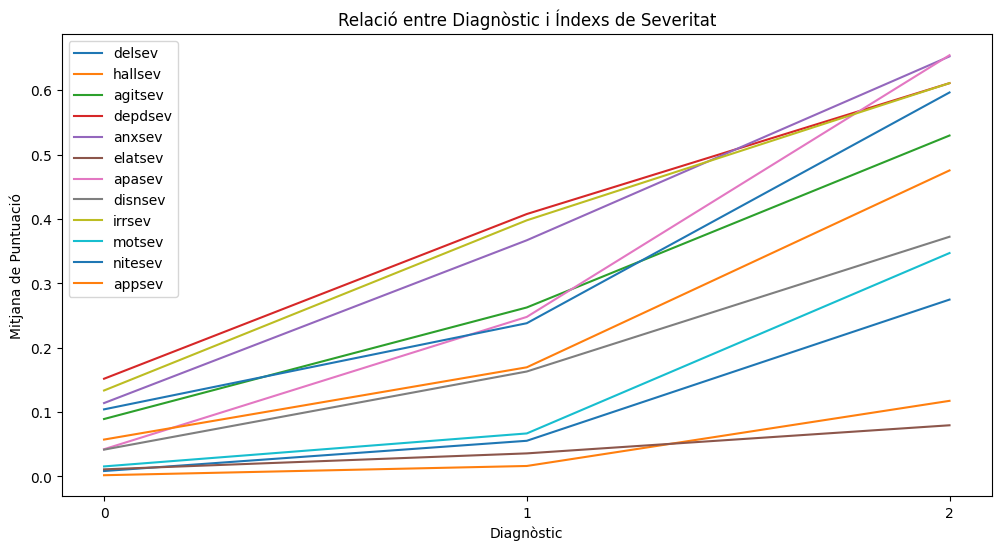

In [12]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# Junto les columnes del índexs de severitat
severitat_columns = ['delsev', 'hallsev', 'agitsev', 'depdsev', 'anxsev', 'elatsev', 'apasev', 'disnsev', 'irrsev', 'motsev', 'nitesev', 'appsev']

# Creo la figura pel gràfic de línies
plt.figure(figsize=(12, 6))

# Bucle per veure les mitjanes dels índexs de severitat segons diagnòstic
for severitat_col in severitat_columns:
    avg_scores = []
    for diagnosis in [0, 1, 2]:
        filtered_df = df.filter(df['diagnosis'] == diagnosis)
        avg_score = filtered_df.select(F.avg(severitat_col)).first()[0]
        avg_scores.append(avg_score)
    
    plt.plot([0, 1, 2], avg_scores, label=severitat_col)

# Configuro el títol i les etiquetes dels eixos
plt.title('Relació entre Diagnòstic i Índexs de Severitat')
plt.xlabel('Diagnòstic')
plt.ylabel('Mitjana de Puntuació')

# Estableixo els valors en l'eix X i les legendes
plt.xticks([0, 1, 2])
plt.legend()

# Faig el gràfic
plt.show()

**<span style="color:#b799cd">Anàlisi del gràfic:</span>**<br>
•	**Les al·lucinacions (hallsev) i l’elevació de l'estat d'ànim (elatsev)** no variem molt durant l’evolució de la malaltia.<br>
•	**La depressió (depdsev) i la irritabilitat (irrsev)** mostren un augment recte entre els diagnòstics 0 i 1 però, aquest augment es veu disminuït cap el diagnòstic 2, lògic si pensem que de cada vegada els pacients tenen menys constància del seu estat.<br>
•	**L’agitació (agitsev), ansietat (anxsev) i disfonia (disnsev)** augmenten casi en línia recta a mesura que la malaltia avança.<br>
•	**La pèrdua de memòria (delsev),  la psicopatia (apasev), la motilitat (motsev), els problemes de son (nitesev) i l’apetit (appsev)** van augmentant a mesura que avança la malaltia però el pacients empitjoren de manera accelerada quan van cap el diagnòstic 2 i per tant, haurien de ser els índexs a tenir en compte quan el malalt passa al següent estat de la malaltia.

In [13]:
#!pip install --upgrade numpy
#!pip install --upgrade scipy

### <span style="color:#b799cd">ANOVA índexs de severitat</span>

In [14]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway

# Separo les dades en grups segons el diagnòstic
grup_dades = [df.filter(df['diagnosis'] == i) for i in [0, 1, 2]]

# Realitzo un ANOVA per a cada variable
p_values = {}
for measure in severitat_columns:
    data = [group.select(measure).toPandas()[measure].to_numpy() for group in grup_dades]
    f_statistic, p_value = f_oneway(*data)
    p_values[measure] = p_value
    
# Ordeno segons els valors p en ordre ascendent
ord_p_values = sorted(p_values.items(), key=lambda x: x[1])

# Valor p del més al menys significatiu
for measure, p_value in ord_p_values:
    print(f'Valor p de {measure}: {p_value}')

Valor p de apasev: 1.1431744507787303e-109
Valor p de anxsev: 3.114676120839814e-67
Valor p de motsev: 2.1681607765216003e-61
Valor p de appsev: 3.434655763379747e-59
Valor p de nitesev: 1.7176664930990094e-55
Valor p de irrsev: 1.7728956178455505e-55
Valor p de agitsev: 1.3931482058714422e-53
Valor p de depdsev: 7.010144445567041e-52
Valor p de delsev: 4.096099127125355e-46
Valor p de disnsev: 3.187838285110642e-45
Valor p de hallsev: 7.749039817996558e-25
Valor p de elatsev: 1.3586713841030138e-08


Tots els índexs de severitat mostren diferències significatives entre almenys dos dels grups de diagnòstic.

En aquest cas, considero realitzar una prova post hoc com la **prova de Tukey** per identificar quins grups tenen diferències significatives entre ells. 

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Creo llistes buides per emmagatzemar les dades i per les etiquetes dels grups
data = []
group_labels = []

# Itero pels grups i els índexs de severitat
for diagnosis in [0, 1, 2]:
    for severitat_col in severitat_columns:
        filtered_df = df.filter(df['diagnosis'] == diagnosis)
        data.extend(filtered_df.select(severitat_col).toPandas()[severitat_col].to_numpy())
        group_labels.extend([f'Diagnòstic {diagnosis}'] * filtered_df.count())

# Executo la prova de Tukey
tukey_res = pairwise_tukeyhsd(data, group_labels)
print(tukey_res)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1       group2    meandiff p-adj lower  upper  reject
-------------------------------------------------------------
Diagnòstic 0 Diagnòstic 1   0.1381   0.0 0.1216 0.1546   True
Diagnòstic 0 Diagnòstic 2   0.3793   0.0 0.3622 0.3964   True
Diagnòstic 1 Diagnòstic 2   0.2412   0.0  0.221 0.2615   True
-------------------------------------------------------------


El resultat mostra que hi ha diferències significatives entre tots els grups comparats (Diagnòstic 0 vs. Diagnòstic 1, Diagnòstic 0 vs. Diagnòstic 2, i Diagnòstic 1 vs. Diagnòstic 2) en les mitjanes de les dades. Això ens diu que els diagnòstics tenen un impacte significativament diferent en els índexs de severitat.

### <span style="color:#b799cd">Relació entre el diagnòstic i activitats quotidianes</span>
bills, taxes, shopping, games, stove, mealprep, events, payattn, remdates i travel

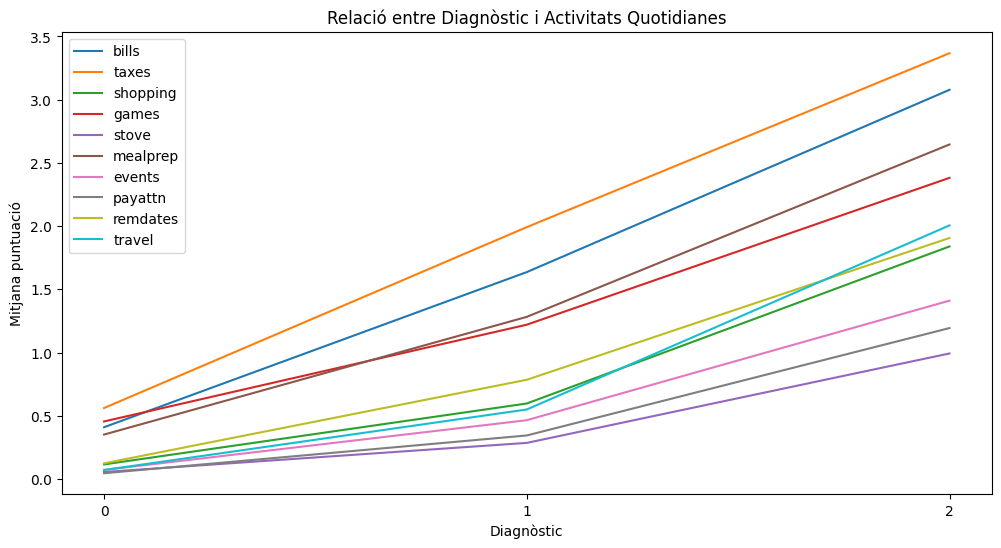

In [16]:
# Junto les columnes de les activitats quotidianes
vida_columns = ['bills', 'taxes', 'shopping', 'games', 'stove', 'mealprep', 'events', 'payattn', 'remdates', 'travel']

# Creo una figura pel gràfic
plt.figure(figsize=(12, 6))

# Bucle per veure les mitjanes de les activitats segons diagnòstic
for vida_col in vida_columns:
    avg_scores = []
    for diagnosis in [0, 1, 2]:
        filtered_df = df.filter(df['diagnosis'] == diagnosis)
        avg_score = filtered_df.select(F.avg(vida_col)).first()[0]
        avg_scores.append(avg_score)
    
    plt.plot([0, 1, 2], avg_scores, label=vida_col)

# Configuro el títol i les etiquetes dels eixos
plt.title('Relació entre Diagnòstic i Activitats Quotidianes')
plt.xlabel('Diagnòstic')
plt.ylabel('Mitjana puntuació')

# Estableixo els valors en l'eix X i les legendes
plt.xticks([0, 1, 2])
plt.legend()

# Faig el gràfic
plt.show()

**<span style="color:#b799cd">Anàlisi del gràfic:</span>**<br>
La major part de les activitats quotidianes mostren un patró similar, quasi una recta, respecte al diagnòstic:<br>
•	**Viatges (travel)** mostra més diferència, ja que té una pujada molt més forta quan es passa de diagnòstic 1 a 2.<br>
•	**Cuinar (mealprep), compra d'aliments i altres productes (shopping) i ús de l'estufa (stove)** també hi ha un canvi, però no és tan gran entre diagnòstic 1 a 2.<br>
•	**Jocs (games), assistència a esdeveniments socials (events), capacitat de prestar atenció (payattn) i recordatori dates (remdates)** mostren una casi recta amb una petita diferència de inclinació.<br>
•	**Gestió de factures (bills) i de taxes (taxes)** mostren una línia perfectament recta amb els 3 diagnòstics. 

### <span style="color:#b799cd">ANOVA activitats de la vida quotidiana</span>

In [17]:
# Realitzo un ANOVA per a cada variable
p_values = {}
for measure in vida_columns:
    data = [group.select(measure).toPandas()[measure].to_numpy() for group in grup_dades]
    f_statistic, p_value = f_oneway(*data)
    p_values[measure] = p_value
    
# Ordeno segons els valors p en ordre ascendent
ord_p_values = sorted(p_values.items(), key=lambda x: x[1])

# Valor p del més al menys significatiu
for measure, p_value in ord_p_values:
    print(f'Valor p de {measure}: {p_value}')

Valor p de travel: 0.0
Valor p de remdates: 1.2590137565425e-311
Valor p de payattn: 2.847476596573715e-201
Valor p de events: 4.750705386603438e-160
Valor p de shopping: 1.6052872988562774e-141
Valor p de bills: 3.5001189857863266e-134
Valor p de taxes: 3.355531209865301e-127
Valor p de mealprep: 2.140782918103268e-96
Valor p de stove: 2.7845194561659846e-72
Valor p de games: 5.290231166933887e-65


Per tant, totes les activitats mostren diferències significatives entre almenys dos dels grups de diagnòstic.

Considero realitzar una prova post hoc com la **prova de Tukey** per identificar quins grups tenen diferències significatives entre ells. 

In [18]:
# Creo llistes buides per emmagatzemar les dades i per les etiquetes dels grups
data = []
group_labels = []

# Itero pels grups i les activitats
for diagnosis in [0, 1, 2]:
    for vida_col in vida_columns:
        filtered_df = df.filter(df['diagnosis'] == diagnosis)
        data.extend(filtered_df.select(vida_col).toPandas()[vida_col].to_numpy())
        group_labels.extend([f'Diagnòstic {diagnosis}'] * filtered_df.count())

# Executo la prova de Tukey
tukey_res = pairwise_tukeyhsd(data, group_labels)
print(tukey_res)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1       group2    meandiff p-adj lower  upper  reject
-------------------------------------------------------------
Diagnòstic 0 Diagnòstic 1   0.6897   0.0 0.6319 0.7474   True
Diagnòstic 0 Diagnòstic 2   1.8559   0.0  1.796 1.9158   True
Diagnòstic 1 Diagnòstic 2   1.1663   0.0 1.0954 1.2371   True
-------------------------------------------------------------


El resultat mostra que els diagnòstics tenen un impacte significativament diferent en les activitats quotidianes.

### <span style="color:#b799cd">Relació entre el diagnòstic i els volums del líquid cefalorraquidi</span>
naccicv, csfvol

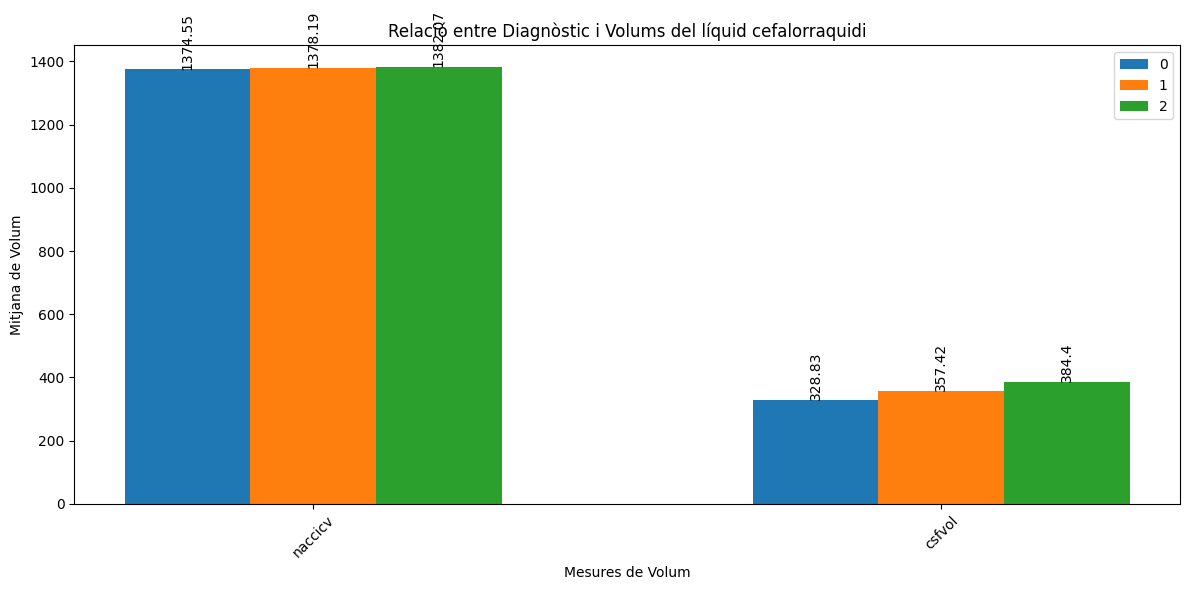

In [19]:
# Junto les columnes de les mesures de volum
volume_measures1 = ['naccicv', 'csfvol']

# Bucle per veure les mitjanes de les proves de diagnòstic segons mesures de volum
data = []
for measure in volume_measures1:
    avg_volumes = []
    for diagnosis in [0, 1, 2]:
        filtered_df = df.filter(df['diagnosis'] == diagnosis)
        avg_volume = filtered_df.select(F.avg(measure)).first()[0]
        avg_volumes.append(avg_volume)
    data.append(avg_volumes)

# Creo un df de Pandas amb les dades
df_barplot = pd.DataFrame(data, columns=['Diagnòstic 0', 'Diagnòstic 1', 'Diagnòstic 2'], index=volume_measures1)

# Creo una figura pel gràfic
plt.figure(figsize=(12, 6))

# Obtinc el nombre de mesures i volums
num_measures = len(volume_measures1)
num_diagnoses = 3  # 0, 1, 2

# Defineixo l'amplada de les barres i les posicions de cada grup
bar_width = 0.2
index = np.arange(num_measures)

# Creo les barres per a cada volum
for i in range(num_diagnoses):
    plt.bar(index + i * bar_width, df_barplot.iloc[:, i], bar_width, label=f'{i}')
    
    # Afegeixo els valors verticalment al costat de les barres
    for j, val in enumerate(df_barplot.iloc[:, i]):
        plt.annotate(round(val, 2), (index[j] + i * bar_width, val), ha='center', va='bottom', rotation=90)

# Configuro el títol i les etiquetes dels eixos
plt.xlabel('Mesures de Volum')
plt.ylabel('Mitjana de Volum')
plt.title('Relació entre Diagnòstic i Volums del líquid cefalorraquidi')

# Estableixo els valors en l'eix X i les legendes
plt.xticks(index + bar_width, volume_measures1, rotation=45)
plt.legend()

# Faig el gràfic
plt.tight_layout()
plt.show()

### <span style="color:#b799cd">Relació entre el diagnòstic i els volums del còrtex cerebral</span>
frcort, lparcort, rparcort, ltempcor, rtempcor, lcac, rcac

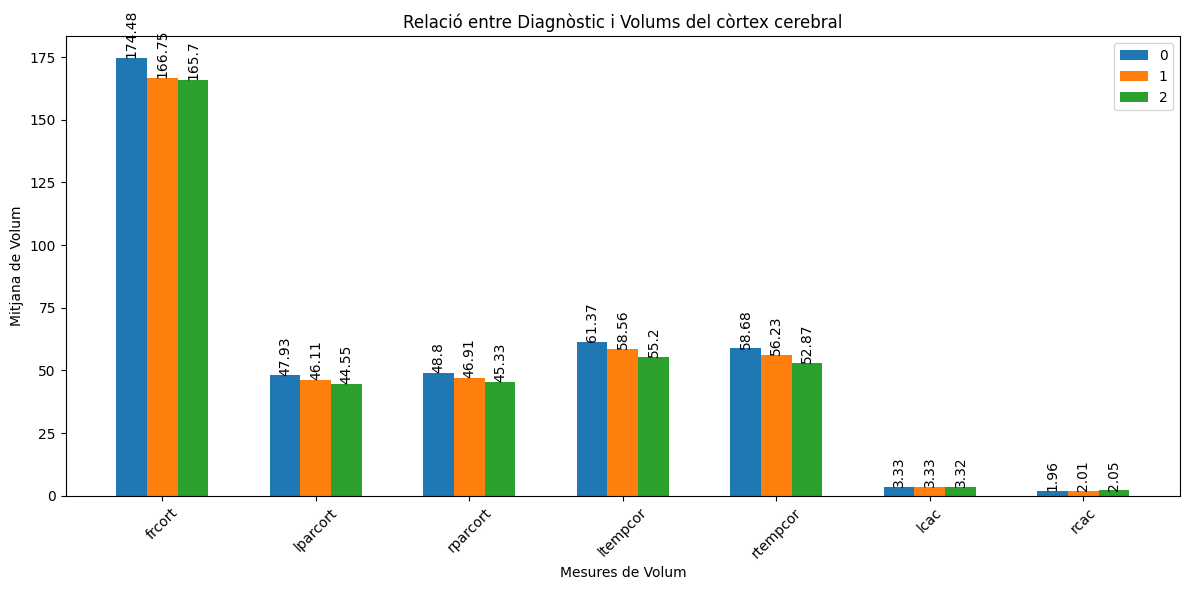

In [20]:
# Junto les columnes de les mesures de volum
volume_measures2 = ['frcort', 'lparcort', 'rparcort', 'ltempcor', 'rtempcor', 'lcac', 'rcac']

# Bucle per veure les mitjanes de les proves de diagnòstic segons mesures de volum
data = []
for measure in volume_measures2:
    avg_volumes = []
    for diagnosis in [0, 1, 2]:
        filtered_df = df.filter(df['diagnosis'] == diagnosis)
        avg_volume = filtered_df.select(F.avg(measure)).first()[0]
        avg_volumes.append(avg_volume)
    data.append(avg_volumes)

# Creo un df de Pandas amb les dades
df_barplot = pd.DataFrame(data, columns=['Diagnòstic 0', 'Diagnòstic 1', 'Diagnòstic 2'], index=volume_measures2)

# Creo una figura pel gràfic
plt.figure(figsize=(12, 6))

# Obtinc el nombre de mesures i volums
num_measures = len(volume_measures2)
num_diagnoses = 3  # 0, 1, 2

# Defineixo l'amplada de les barres i les posicions de cada grup
bar_width = 0.2
index = np.arange(num_measures)

# Creo les barres per a cada volum
for i in range(num_diagnoses):
    plt.bar(index + i * bar_width, df_barplot.iloc[:, i], bar_width, label=f'{i}')
    
    # Afegeixo els valors verticalment al costat de les barres
    for j, val in enumerate(df_barplot.iloc[:, i]):
        plt.annotate(round(val, 2), (index[j] + i * bar_width, val), ha='center', va='bottom', rotation=90)

# Configuro el títol i les etiquetes dels eixos
plt.xlabel('Mesures de Volum')
plt.ylabel('Mitjana de Volum')
plt.title('Relació entre Diagnòstic i Volums del còrtex cerebral')

# Estableixo els valors en l'eix X i les legendes
plt.xticks(index + bar_width, volume_measures2, rotation=45)
plt.legend()

# Faig el gràfic
plt.tight_layout()
plt.show()

### <span style="color:#b799cd">Relació entre el diagnòstic i dels lòbuls cerebrals i de regions cerebrals específiques</span>
lhippo, rhippo, lent, rent, lparhip, rparhip, lposcin, rposcin

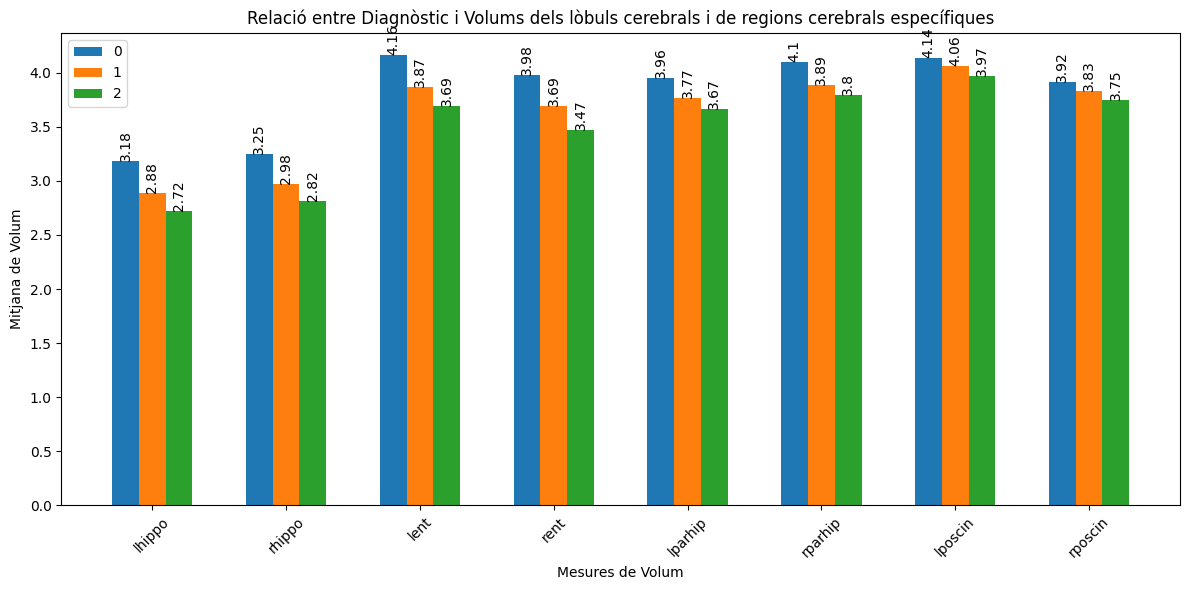

In [21]:
# Junto les columnes de les mesures de volum
volume_measures3 = ['lhippo', 'rhippo', 'lent', 'rent', 'lparhip', 'rparhip', 'lposcin', 'rposcin']

# Bucle per veure les mitjanes de les proves de diagnòstic segons mesures de volum
data = []
for measure in volume_measures3:
    avg_volumes = []
    for diagnosis in [0, 1, 2]:
        filtered_df = df.filter(df['diagnosis'] == diagnosis)
        avg_volume = filtered_df.select(F.avg(measure)).first()[0]
        avg_volumes.append(avg_volume)
    data.append(avg_volumes)

# Creo un df de Pandas amb les dades
df_barplot = pd.DataFrame(data, columns=['Diagnòstic 0', 'Diagnòstic 1', 'Diagnòstic 2'], index=volume_measures3)

# Creo una figura pel gràfic
plt.figure(figsize=(12, 6))

# Obtinc el nombre de mesures i volums
num_measures = len(volume_measures3)
num_diagnoses = 3  # 0, 1, 2

# Defineixo l'amplada de les barres i les posicions de cada grup
bar_width = 0.2
index = np.arange(num_measures)

# Creo les barres per a cada volum
for i in range(num_diagnoses):
    plt.bar(index + i * bar_width, df_barplot.iloc[:, i], bar_width, label=f'{i}')
    
    # Afegeixo els valors verticalment al costat de les barres
    for j, val in enumerate(df_barplot.iloc[:, i]):
        plt.annotate(round(val, 2), (index[j] + i * bar_width, val), ha='center', va='bottom', rotation=90)

# Configuro el títol i les etiquetes dels eixos
plt.xlabel('Mesures de Volum')
plt.ylabel('Mitjana de Volum')
plt.title('Relació entre Diagnòstic i Volums dels lòbuls cerebrals i de regions cerebrals específiques')

# Estableixo els valors en l'eix X i les legendes
plt.xticks(index + bar_width, volume_measures3, rotation=45)
plt.legend()

# Faig el gràfic
plt.tight_layout()
plt.show()

**<span style="color:#b799cd">Anàlisi del gràfic:</span>**<br>
Divideixo els volums segons regió cerebral:<br>
•	**Líquid cefalorraquidi (naccicv, csfvol)** mostren poca diferències entre diagnòstics, csfvol mostra un lleu augment a mesura que el diagnòstic empitjora.<br>
•	**Còrtex cerebral (frcort, lparcort, rparcort, ltempcor, rtempcor, lcac, rcac)**, excepte lcac i rcac que no mostren canvis, els altres volums nostre una disminució a mesura que el diagnòstic empitjora.<br>
•	**Lòbuls i regions específiques (lhippo, rhippo, lent, rent, lparhip, rparhip, lposcin, rposcin)** tots mostren baixades clares a mesura que el diagnòstic empitjora, aquestes baixades són menys importants pels volums del còrtex post-central esquerre i dret (lposcin i rposcin).

### <span style="color:#b799cd">ANOVA volums cerebrals</span>

In [22]:
# Junto els grups de volume_measures
volume_measures = ['naccicv', 'csfvol', 'frcort', 'lparcort', 'rparcort', 'ltempcor', 'rtempcor', 'lcac', 'rcac', 'lhippo', 'rhippo', 'lent', 'rent', 'lparhip', 'rparhip', 'lposcin', 'rposcin']

# Realitzo un ANOVA per a cada variable
p_values = {}
for measure in volume_measures:
    data = [group.select(measure).toPandas()[measure].to_numpy() for group in grup_dades]
    f_statistic, p_value = f_oneway(*data)
    p_values[measure] = p_value
    
# Ordeno segons els valors p en ordre ascendent
ord_p_values = sorted(p_values.items(), key=lambda x: x[1])

# Valor p del més al menys significatiu
for measure, p_value in ord_p_values:
    print(f'Valor p de {measure}: {p_value}')

Valor p de lhippo: 2.8250550067291407e-99
Valor p de rhippo: 1.0483162975548865e-86
Valor p de csfvol: 4.320693234301411e-78
Valor p de ltempcor: 2.748403251737673e-61
Valor p de rtempcor: 1.2166403605523425e-57
Valor p de rent: 9.491040777521752e-54
Valor p de lent: 2.9440013812146166e-49
Valor p de rparhip: 1.1585464271890356e-35
Valor p de lparhip: 5.77302288210631e-32
Valor p de rparcort: 4.8236653360338874e-27
Valor p de lparcort: 6.653474972678484e-27
Valor p de frcort: 1.943511921427729e-18
Valor p de rposcin: 1.467240304792359e-06
Valor p de lposcin: 4.725722156099686e-06
Valor p de rcac: 0.002477334363342097
Valor p de naccicv: 0.5132601288330372
Valor p de lcac: 0.989526069211607


Els volums de líquid cefalorraquidi (naccicv) i de còrtex cingular anterior esquerre (lcac) són els únics que no mostren diferències significatives, la resta mostra significança en diferents nivells. 

Considero realitzar una prova post hoc com la **prova de Tukey** per identificar quins grups tenen diferències significatives entre ells. 

In [23]:
# Creo llistes buides per emmagatzemar les dades i per les etiquetes dels grups
data = []
group_labels = []

# Itero pels grups i els volums
for diagnosis in [0, 1, 2]:
    for measure in volume_measures:
        filtered_df = df.filter(df['diagnosis'] == diagnosis)
        data.extend(filtered_df.select(measure).toPandas()[measure].to_numpy())
        group_labels.extend([f'Diagnòstic {diagnosis}'] * filtered_df.count())

# Executo la prova de Tukey
tukey_res = pairwise_tukeyhsd(data, group_labels)
print(tukey_res)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
Diagnòstic 0 Diagnòstic 1   0.8162 0.9746 -8.0474  9.6798  False
Diagnòstic 0 Diagnòstic 2   1.9273 0.8756 -7.2734 11.1281  False
Diagnòstic 1 Diagnòstic 2   1.1111 0.9689  -9.768 11.9902  False
----------------------------------------------------------------


El resultat mostra que els volums cerebrals no mostren diferències estadísticament significatives entre els grups diagnòstic (0, 1 i 2).

# <span style="color:#650099">Objectiu principal</span>

L'objectiu principal d'aquest projecte és identificar les associacions entre els volums cerebrals i els símptomes de la malaltia d'Alzheimer però, amb el resultat de la prova de Tukey, al no ve significança entre diagnòstics amb els volums cerebrals, ja ens indica que no podrem fer servir tots els volums cerebrals, per això, buscaré les variables que mostrin una major significació fent un **anàlisi Chi-quadrat**.

In [24]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import ChiSquareTest

# Columnes a analitzar
volum_column = ['csfvol', 'frcort', 'lparcort', 'rparcort', 'ltempcor', 'rtempcor', 'rcac', 'lhippo', 'rhippo', 'lent', 'rent', 'lparhip', 'rparhip', 'lposcin', 'rposcin']
severitat_column = ['delsev', 'hallsev', 'agitsev', 'depdsev', 'anxsev', 'elatsev', 'apasev', 'disnsev', 'irrsev', 'motsev', 'nitesev', 'appsev']

# Combino les dues llistes en una
all_column = volum_column + severitat_column

# Creo un vector assembler amb la combinació
assembler = VectorAssembler(inputCols=all_column, outputCol="features")
assembled_df = assembler.transform(df)

# Realitzo la prova de Chi-quadrat
chi_square_test = ChiSquareTest.test(assembled_df, "features", "diagnosis")

# Estableixo la significància per filtrar les relacions significatives
alfa = 0.05

# Transformo el resultat de la prova de Chi-quadrat a 2 llistes de tuples (variable, valor p)
result_list = [(all_column[i], p) for i, p in enumerate(chi_square_test.select("pValues").first()[0])]

# Separo els resultats segons les columnes de volum i les de severitat
volum_result = [item for item in result_list if item[0] in volum_column and item[1] < alfa]
severitat_result = [item for item in result_list if item[0] in severitat_column and item[1] < alfa]

# Imprimeixo
print("Variables significatives dels volums cerebrals:")
for variable, p_value in volum_result:
    print(f"Variable: {variable}, valor p: {p_value}")

print("Variables significatives dels índexs de severitat:")
for variable, p_value in severitat_result:
    print(f"Variable: {variable}, valor p: {p_value}")
    

Variables significatives dels volums cerebrals:
Variable: lhippo, valor p: 4.356754602286017e-05
Variable: rhippo, valor p: 2.1861542591761207e-06
Variable: lent, valor p: 0.0038012945365735185
Variable: rent, valor p: 0.0038137578772011738
Variable: lparhip, valor p: 0.003068761699898115
Variable: rparhip, valor p: 0.036266949638972035
Variables significatives dels índexs de severitat:
Variable: delsev, valor p: 0.0
Variable: hallsev, valor p: 0.0
Variable: agitsev, valor p: 0.0
Variable: depdsev, valor p: 0.0
Variable: anxsev, valor p: 0.0
Variable: elatsev, valor p: 8.04900537332287e-08
Variable: apasev, valor p: 0.0
Variable: disnsev, valor p: 0.0
Variable: irrsev, valor p: 0.0
Variable: motsev, valor p: 0.0
Variable: nitesev, valor p: 0.0
Variable: appsev, valor p: 0.0


Aquests resultats indiquen per les variables de volum **lhippo i rhippo (hipocamp esquerre i dret)** tenen valors p molt petits, el que indica que estan relacionades de manera significativa amb els diferents diagnòstics. **lent, rent (enuc esquerre i dret), lparhip i rparhip (parahipocamp esquerre i dret)** tenen valors p significatius, però la relació és menys forta que en els casos anteriors.

Per les variables dels índexs de severitat, totes les columnes tenen valors p molt petits, i totes són iguals a 0, excepte **elatsev (elevació de l'estat d'ànim)** que mostra una relació una mica més forta. Això significa que les variacions en aquestes variables estan fortament relacionades amb els diferents diagnòstics i són molt significatives.

## <span style="color:#9366b3">Prediccions mitjançant regressió lineal</span>

Per predir els índexs de severitat que queden afectats pels canvis en els volums cerebrals, utilitzo la tècnica de regressió lineal. La **regressió lineal** em permetrà establir una relació entre les variables independents (els volums cerebrals) i les variables dependents (els índexs de severitat) i, per tant, predir els índexs de severitat en funció dels volums cerebrals. Per visualitzar-lo millor, generaré gràfics de regressió per a cada índex de severitat per veure com les prediccions es comparen amb les dades reals.

Prediccions per a l'índex de severitat delsev:
+--------------------+------+--------------------+
|               volum|delsev|          prediction|
+--------------------+------+--------------------+
|[2.94,2.89,3.83,3...|   0.0|    0.09122690007362|
|[2.6826,2.1533,3....|   0.0|   0.099332565752204|
|[3.624,3.593,5.26...|   0.0|0.017631831914068474|
|[2.9268,3.3691,3....|   0.0|0.031587303967883895|
|[2.68,2.64,3.25,3...|   0.0| 0.11334204662999814|
|[2.69,2.73,3.7,3....|   0.0|  0.0950875255336795|
|[2.8545,2.871,2.9...|   0.0| 0.11606455305515323|
|[2.876,2.886,3.17...|   0.0| 0.06217788451304662|
|[2.6694,2.6579,3....|   0.0| 0.08444233749596375|
|[2.375,2.528,2.69...|   0.0| 0.13792179688315953|
|[3.528,3.634,5.17...|   0.0|  0.0434650785236082|
|[3.3975,3.4318,4....|   0.0| 0.04489129380714424|
|[2.38,2.7,4.27,4....|   0.0| 0.12575840184647358|
|[2.9691,3.2065,4....|   0.0| 0.08684936054510856|
|[2.6179,2.7729,3....|   0.0| 0.08169600239714592|
|[3.882,3.808,5.35...|   0.0| -0.02

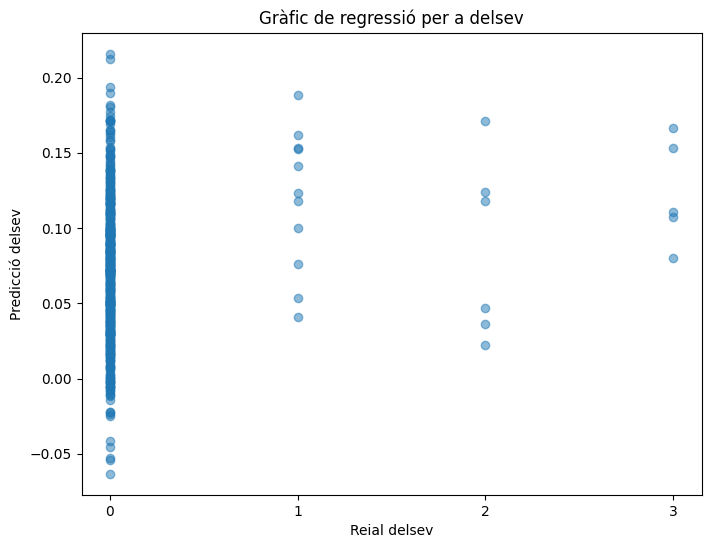

Prediccions per a l'índex de severitat hallsev:
+--------------------+-------+--------------------+
|               volum|hallsev|          prediction|
+--------------------+-------+--------------------+
|[2.94,2.89,3.83,3...|    0.0| 0.03877112510870752|
|[2.6826,2.1533,3....|    0.0| 0.05758310385887763|
|[3.624,3.593,5.26...|    0.0|0.014459786853915635|
|[2.9268,3.3691,3....|    0.0|0.005210625170317...|
|[2.68,2.64,3.25,3...|    0.0| 0.04628599465101549|
|[2.69,2.73,3.7,3....|    0.0|  0.0399167627011941|
|[2.8545,2.871,2.9...|    0.0|0.037547678448822966|
|[2.876,2.886,3.17...|    0.0|  0.0203545703814923|
|[2.6694,2.6579,3....|    0.0| 0.02659136151372156|
|[2.375,2.528,2.69...|    0.0|  0.0467246767923373|
|[3.528,3.634,5.17...|    0.0|0.024027817476070662|
|[3.3975,3.4318,4....|    0.0|0.019411507986401066|
|[2.38,2.7,4.27,4....|    0.0|0.048776437050841406|
|[2.9691,3.2065,4....|    0.0|0.040398367574651484|
|[2.6179,2.7729,3....|    0.0|  0.0329680966226369|
|[3.882,3.808,5.

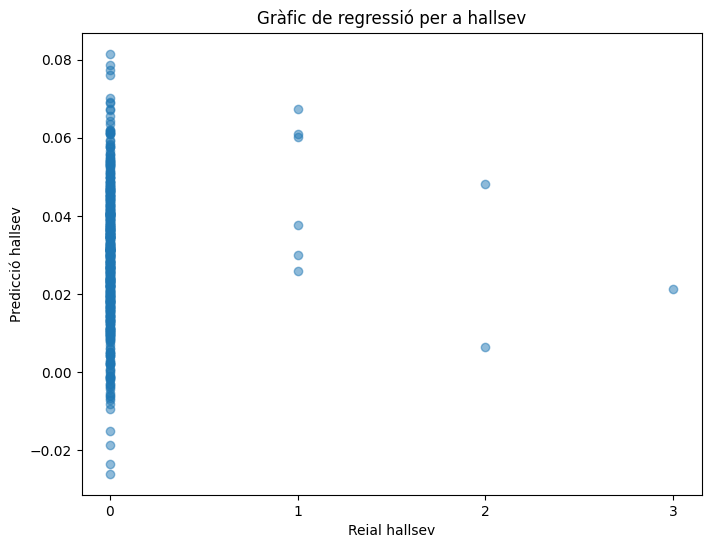

Prediccions per a l'índex de severitat agitsev:
+--------------------+-------+-------------------+
|               volum|agitsev|         prediction|
+--------------------+-------+-------------------+
|[2.94,2.89,3.83,3...|    0.0|0.24617409610597013|
|[2.6826,2.1533,3....|    0.0| 0.3486018442758879|
|[3.624,3.593,5.26...|    0.0|0.12610488120626084|
|[2.9268,3.3691,3....|    0.0|0.12833101501287403|
|[2.68,2.64,3.25,3...|    0.0|0.28805700038402415|
|[2.69,2.73,3.7,3....|    0.0|0.26372649955209515|
|[2.8545,2.871,2.9...|    1.0|0.22841561263656912|
|[2.876,2.886,3.17...|    0.0|0.18092449071459582|
|[2.6694,2.6579,3....|    0.0| 0.1814297205033255|
|[2.375,2.528,2.69...|    0.0|0.28882187586233926|
|[3.528,3.634,5.17...|    1.0|0.17672909473757947|
|[3.3975,3.4318,4....|    0.0|0.16395344312987348|
|[2.38,2.7,4.27,4....|    0.0|  0.286909345059627|
|[2.9691,3.2065,4....|    0.0|0.25737225441807227|
|[2.6179,2.7729,3....|    0.0| 0.2451718953185955|
|[3.882,3.808,5.35...|    0.0| 0.1

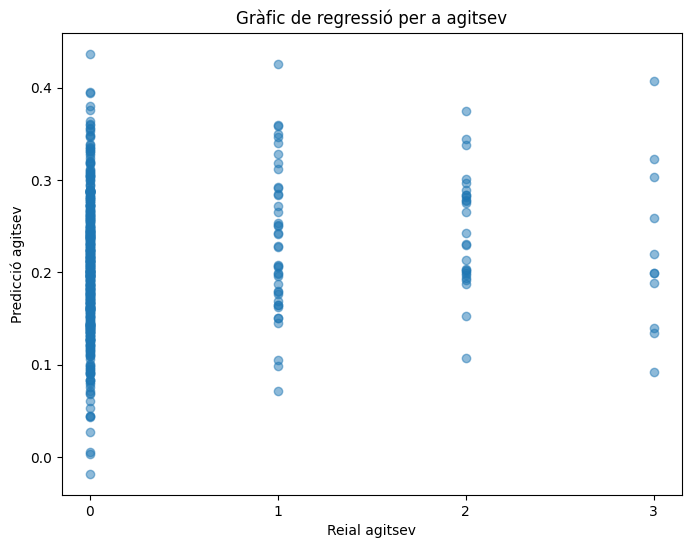

Prediccions per a l'índex de severitat depdsev:
+--------------------+-------+-------------------+
|               volum|depdsev|         prediction|
+--------------------+-------+-------------------+
|[2.94,2.89,3.83,3...|    1.0| 0.3312380257655224|
|[2.6826,2.1533,3....|    0.0| 0.3818939797177027|
|[3.624,3.593,5.26...|    0.0|0.23872068937794666|
|[2.9268,3.3691,3....|    1.0|0.21064543814174386|
|[2.68,2.64,3.25,3...|    0.0| 0.3584453697817933|
|[2.69,2.73,3.7,3....|    0.0| 0.3346267748499898|
|[2.8545,2.871,2.9...|    2.0|0.34999040443827356|
|[2.876,2.886,3.17...|    0.0|  0.278951874794507|
|[2.6694,2.6579,3....|    0.0|0.33448524167579474|
|[2.375,2.528,2.69...|    0.0|0.37783641971991255|
|[3.528,3.634,5.17...|    0.0| 0.2543108775463364|
|[3.3975,3.4318,4....|    1.0|0.25148498487025794|
|[2.38,2.7,4.27,4....|    0.0| 0.3803460422993386|
|[2.9691,3.2065,4....|    0.0|0.31557122037392915|
|[2.6179,2.7729,3....|    0.0| 0.3079510344969316|
|[3.882,3.808,5.35...|    0.0|0.16

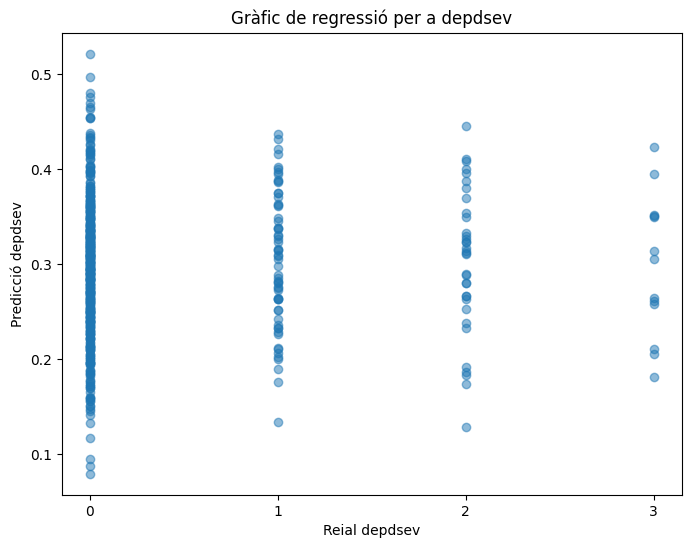

Prediccions per a l'índex de severitat anxsev:
+--------------------+------+-------------------+
|               volum|anxsev|         prediction|
+--------------------+------+-------------------+
|[2.94,2.89,3.83,3...|   0.0|0.32783346995346097|
|[2.6826,2.1533,3....|   0.0| 0.5046705844346568|
|[3.624,3.593,5.26...|   0.0|0.16789862032328218|
|[2.9268,3.3691,3....|   0.0|0.19009863671256555|
|[2.68,2.64,3.25,3...|   1.0| 0.3911255994747122|
|[2.69,2.73,3.7,3....|   0.0|0.36050273155743756|
|[2.8545,2.871,2.9...|   3.0|  0.286627624288075|
|[2.876,2.886,3.17...|   2.0|0.26690884655596325|
|[2.6694,2.6579,3....|   1.0|0.24559069267368439|
|[2.375,2.528,2.69...|   0.0|0.37899720613446564|
|[3.528,3.634,5.17...|   0.0|0.22361895313310887|
|[3.3975,3.4318,4....|   0.0| 0.2250522548816999|
|[2.38,2.7,4.27,4....|   0.0| 0.3555639843800533|
|[2.9691,3.2065,4....|   0.0|0.32606678084397406|
|[2.6179,2.7729,3....|   0.0| 0.3464426823945789|
|[3.882,3.808,5.35...|   0.0| 0.1800549004008969|
|[3

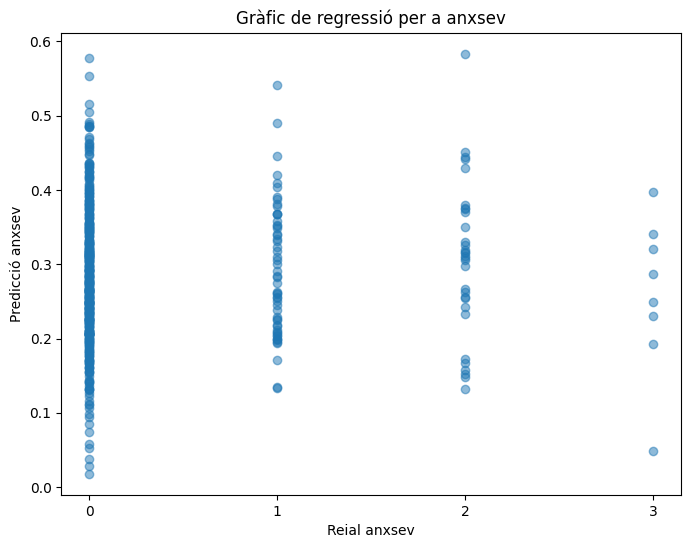

Prediccions per a l'índex de severitat elatsev:
+--------------------+-------+--------------------+
|               volum|elatsev|          prediction|
+--------------------+-------+--------------------+
|[2.94,2.89,3.83,3...|    0.0|  0.0343138922261535|
|[2.6826,2.1533,3....|    0.0| 0.03723674447380643|
|[3.624,3.593,5.26...|    0.0|-0.01212344764853...|
|[2.9268,3.3691,3....|    0.0|0.054120832044102646|
|[2.68,2.64,3.25,3...|    0.0|0.049724972049290814|
|[2.69,2.73,3.7,3....|    0.0|0.044779537681505666|
|[2.8545,2.871,2.9...|    0.0|  0.0637839500015586|
|[2.876,2.886,3.17...|    0.0| 0.06861993181320088|
|[2.6694,2.6579,3....|    0.0| 0.07181029385622943|
|[2.375,2.528,2.69...|    0.0| 0.07793223584204159|
|[3.528,3.634,5.17...|    0.0|-0.01482351704989...|
|[3.3975,3.4318,4....|    0.0|0.018065665962818805|
|[2.38,2.7,4.27,4....|    0.0|0.036087486115158385|
|[2.9691,3.2065,4....|    0.0|3.116638529097049E-4|
|[2.6179,2.7729,3....|    0.0| 0.05200921358837361|
|[3.882,3.808,5.

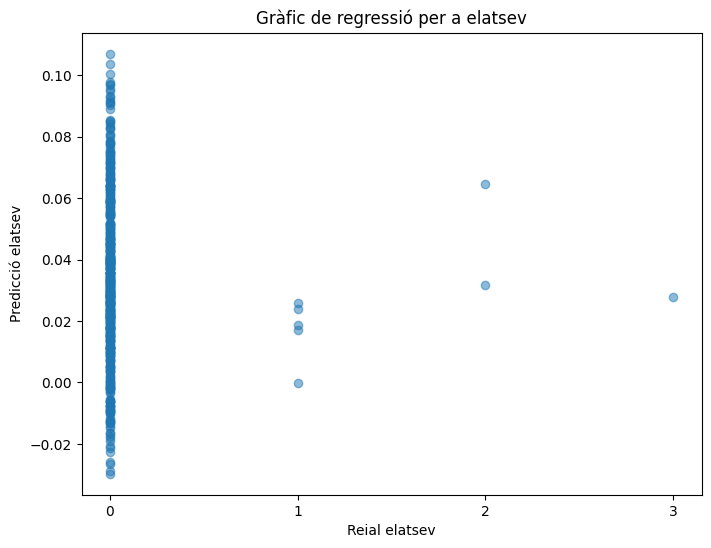

Prediccions per a l'índex de severitat apasev:
+--------------------+------+-------------------+
|               volum|apasev|         prediction|
+--------------------+------+-------------------+
|[2.94,2.89,3.83,3...|   0.0|0.23089333644364501|
|[2.6826,2.1533,3....|   0.0| 0.3942563331768667|
|[3.624,3.593,5.26...|   0.0|0.07094640084707515|
|[2.9268,3.3691,3....|   0.0|0.26510276900672064|
|[2.68,2.64,3.25,3...|   0.0|0.24601558253828754|
|[2.69,2.73,3.7,3....|   0.0|0.27855834355208986|
|[2.8545,2.871,2.9...|   3.0|0.24132513825768137|
|[2.876,2.886,3.17...|   1.0| 0.2784299312857966|
|[2.6694,2.6579,3....|   0.0| 0.2610866491938049|
|[2.375,2.528,2.69...|   0.0| 0.3046242453524779|
|[3.528,3.634,5.17...|   1.0|0.09745174546666946|
|[3.3975,3.4318,4....|   0.0|0.12399778329000344|
|[2.38,2.7,4.27,4....|   0.0| 0.2798435701893723|
|[2.9691,3.2065,4....|   0.0|0.18062708177834413|
|[2.6179,2.7729,3....|   0.0| 0.2930570900531059|
|[3.882,3.808,5.35...|   0.0|0.07223117986455596|
|[3

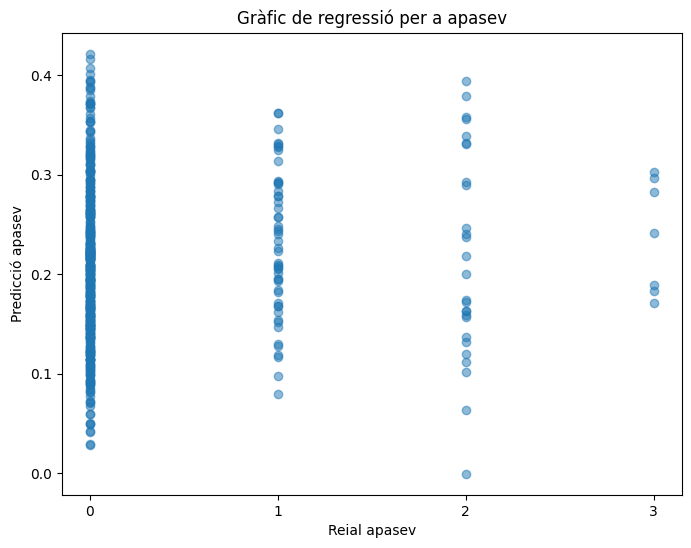

Prediccions per a l'índex de severitat disnsev:
+--------------------+-------+-------------------+
|               volum|disnsev|         prediction|
+--------------------+-------+-------------------+
|[2.94,2.89,3.83,3...|    0.0|0.14892684527089795|
|[2.6826,2.1533,3....|    0.0| 0.2010668311976494|
|[3.624,3.593,5.26...|    0.0|0.06210048350304703|
|[2.9268,3.3691,3....|    0.0|0.13110078731292274|
|[2.68,2.64,3.25,3...|    0.0|0.18656293142176222|
|[2.69,2.73,3.7,3....|    0.0|0.17782450748811435|
|[2.8545,2.871,2.9...|    0.0|0.14153366988777277|
|[2.876,2.886,3.17...|    0.0| 0.1411370200013225|
|[2.6694,2.6579,3....|    0.0|0.13813212723274448|
|[2.375,2.528,2.69...|    0.0|0.20476137222072335|
|[3.528,3.634,5.17...|    0.0| 0.0897675177544458|
|[3.3975,3.4318,4....|    0.0|0.09944064664402291|
|[2.38,2.7,4.27,4....|    0.0|0.19590765051786452|
|[2.9691,3.2065,4....|    0.0|0.15588657143110574|
|[2.6179,2.7729,3....|    0.0|0.18451709498795382|
|[3.882,3.808,5.35...|    0.0|0.05

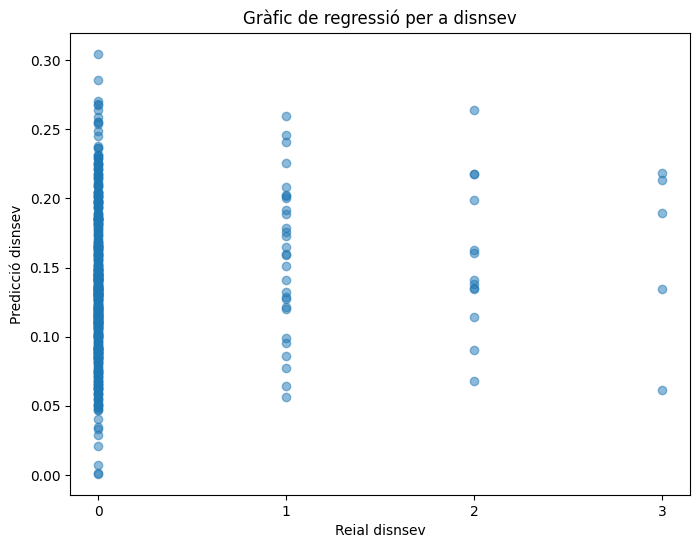

Prediccions per a l'índex de severitat irrsev:
+--------------------+------+-------------------+
|               volum|irrsev|         prediction|
+--------------------+------+-------------------+
|[2.94,2.89,3.83,3...|   0.0| 0.3110481208384906|
|[2.6826,2.1533,3....|   0.0| 0.4096517095344499|
|[3.624,3.593,5.26...|   0.0|0.25673435685840784|
|[2.9268,3.3691,3....|   0.0|0.20534965021764046|
|[2.68,2.64,3.25,3...|   1.0|0.37517442346223345|
|[2.69,2.73,3.7,3....|   0.0|0.34661045772199056|
|[2.8545,2.871,2.9...|   0.0|0.23347628747622695|
|[2.876,2.886,3.17...|   0.0|0.24420478913687121|
|[2.6694,2.6579,3....|   1.0|0.26839890462068416|
|[2.375,2.528,2.69...|   0.0|0.33585076522968754|
|[3.528,3.634,5.17...|   2.0|0.26827758356349934|
|[3.3975,3.4318,4....|   0.0|  0.255495341537126|
|[2.38,2.7,4.27,4....|   0.0| 0.3794985776837907|
|[2.9691,3.2065,4....|   0.0|0.35894940565975475|
|[2.6179,2.7729,3....|   0.0|0.34591911910891376|
|[3.882,3.808,5.35...|   0.0|0.25396705130534697|
|[3

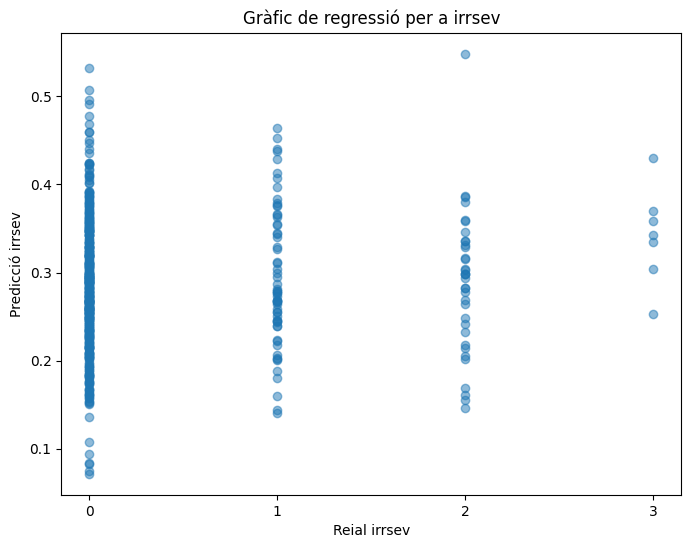

Prediccions per a l'índex de severitat motsev:
+--------------------+------+--------------------+
|               volum|motsev|          prediction|
+--------------------+------+--------------------+
|[2.94,2.89,3.83,3...|   0.0| 0.11978596513806486|
|[2.6826,2.1533,3....|   0.0| 0.23521411569869502|
|[3.624,3.593,5.26...|   0.0| 0.04031694033956684|
|[2.9268,3.3691,3....|   0.0|  0.0683362777114925|
|[2.68,2.64,3.25,3...|   0.0|  0.1285153889624897|
|[2.69,2.73,3.7,3....|   0.0| 0.13432412385726275|
|[2.8545,2.871,2.9...|   0.0| 0.09743970181164516|
|[2.876,2.886,3.17...|   0.0|  0.0926536986680182|
|[2.6694,2.6579,3....|   0.0| 0.07306057474769528|
|[2.375,2.528,2.69...|   0.0|  0.1278179644546304|
|[3.528,3.634,5.17...|   0.0| 0.07281421823827472|
|[3.3975,3.4318,4....|   0.0|0.059035266530285624|
|[2.38,2.7,4.27,4....|   0.0|  0.1333666592981585|
|[2.9691,3.2065,4....|   0.0|  0.1172152748488276|
|[2.6179,2.7729,3....|   0.0| 0.12565029002669487|
|[3.882,3.808,5.35...|   0.0| 0.050

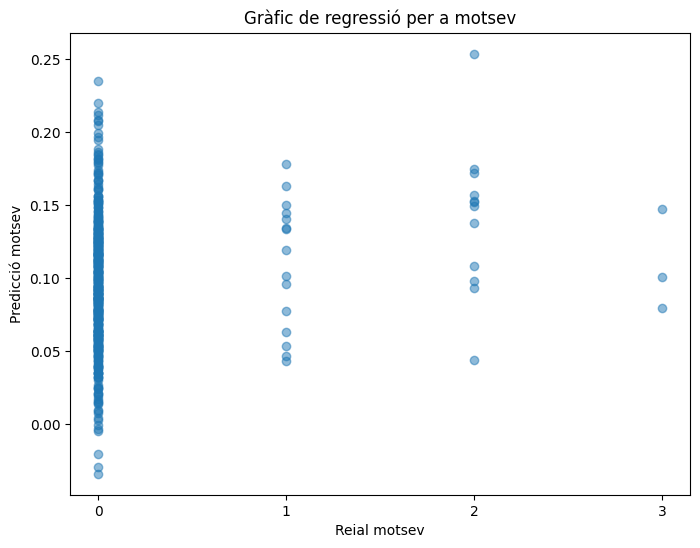

Prediccions per a l'índex de severitat nitesev:
+--------------------+-------+-------------------+
|               volum|nitesev|         prediction|
+--------------------+-------+-------------------+
|[2.94,2.89,3.83,3...|    0.0|0.22449161116008445|
|[2.6826,2.1533,3....|    0.0|0.20455559452334132|
|[3.624,3.593,5.26...|    0.0|0.18274230469274724|
|[2.9268,3.3691,3....|    0.0| 0.2524724533168641|
|[2.68,2.64,3.25,3...|    0.0|0.27853283400697587|
|[2.69,2.73,3.7,3....|    0.0|  0.267492444930272|
|[2.8545,2.871,2.9...|    3.0|0.17380953599580493|
|[2.876,2.886,3.17...|    3.0|0.18704401595770448|
|[2.6694,2.6579,3....|    1.0|0.15911252087929784|
|[2.375,2.528,2.69...|    0.0| 0.2778298708991529|
|[3.528,3.634,5.17...|    1.0|0.23931088694983355|
|[3.3975,3.4318,4....|    0.0| 0.2167300268642055|
|[2.38,2.7,4.27,4....|    0.0| 0.3197368002303021|
|[2.9691,3.2065,4....|    0.0|0.32399473853336325|
|[2.6179,2.7729,3....|    1.0|  0.293233823559892|
|[3.882,3.808,5.35...|    0.0| 0.2

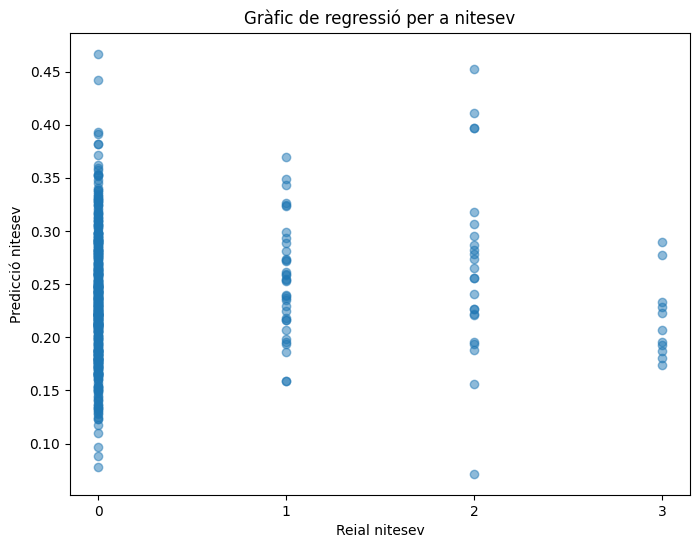

Prediccions per a l'índex de severitat appsev:
+--------------------+------+-------------------+
|               volum|appsev|         prediction|
+--------------------+------+-------------------+
|[2.94,2.89,3.83,3...|   0.0|0.19082327191023246|
|[2.6826,2.1533,3....|   0.0| 0.2544184149002062|
|[3.624,3.593,5.26...|   0.0|0.09741091902448729|
|[2.9268,3.3691,3....|   0.0|0.15165998740857278|
|[2.68,2.64,3.25,3...|   0.0| 0.2091951493421968|
|[2.69,2.73,3.7,3....|   0.0|0.20573154719894565|
|[2.8545,2.871,2.9...|   3.0|0.20866467885444356|
|[2.876,2.886,3.17...|   0.0| 0.1858191156032291|
|[2.6694,2.6579,3....|   0.0|0.19988744628349808|
|[2.375,2.528,2.69...|   0.0|0.23860588781354014|
|[3.528,3.634,5.17...|   0.0|0.11565331246742516|
|[3.3975,3.4318,4....|   0.0|0.12667442198157214|
|[2.38,2.7,4.27,4....|   0.0|0.22175272785091216|
|[2.9691,3.2065,4....|   0.0| 0.1656972542724398|
|[2.6179,2.7729,3....|   0.0| 0.1989390008287616|
|[3.882,3.808,5.35...|   0.0|0.06968700690956942|
|[3

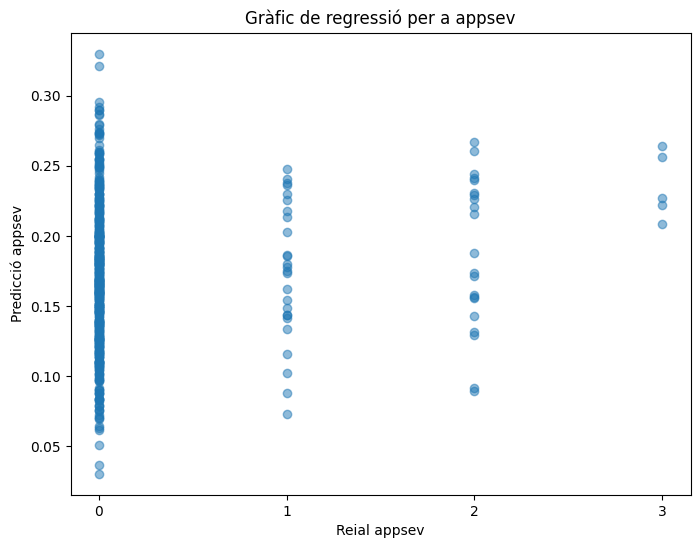

In [26]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

# Columnes a analitzar
volum_column = ['lhippo', 'rhippo', 'lent', 'rent', 'lparhip', 'rparhip']
severitat_columns = ['delsev', 'hallsev', 'agitsev', 'depdsev', 'anxsev', 'elatsev', 'apasev', 'disnsev', 'irrsev', 'motsev', 'nitesev', 'appsev']

# Divideixo les dades en conjunts d'entrenament i prova
(training_data, test_data) = df.randomSplit([0.8, 0.2], seed=42)

# Bucle per ajustar un model per a cada índex de severitat
for severitat_column in severitat_columns:
    # Creo un VectorAssembler amb els volums cerebrals
    assembler = VectorAssembler(inputCols=volum_column, outputCol="volum")

    # Creo el model de regressió lineal
    lr = LinearRegression(featuresCol="volum", labelCol=severitat_column)

    # Creo un pipeline per organitzar les etapes
    pipeline = Pipeline(stages=[assembler, lr])

    # Ajusto el model a les dades d'entrenament
    model = pipeline.fit(training_data)

    # Faig les prediccions amb les dades de prova
    predictions = model.transform(test_data)

    # Prediccions per a cada índex de severitat
    print(f"Prediccions per a l'índex de severitat {severitat_column}:")
    predictions.select("volum", severitat_column, "prediction").show()

    # Genero el gràfic de regressió
    valors_x = [0, 1, 2, 3]
    plt.figure(figsize=(8, 6))
    plt.xticks(valors_x)
    plt.scatter(predictions.select(severitat_column).collect(), predictions.select("prediction").collect(), alpha=0.5)
    plt.title(f"Gràfic de regressió per a {severitat_column}")
    plt.xlabel(f"Reial {severitat_column}")
    plt.ylabel(f"Predicció {severitat_column}")
    plt.show()

Els gràfics ens mostren que la predicció no ha sortit del tot bé per això, faig un **ajust per veure la importància de cada volum cerebral** en la predicció.

In [27]:
# Importància dels volums cerebrals 
volum_import = model.stages[-1].coefficients

# Ara pots mostrar la importància de cada volum cerebral
for volum, importance in zip(volum_column, volum_import):
    print(f"Volum cerebral: {volum}, Importància: {importance}")

Volum cerebral: lhippo, Importància: -0.0591908881656163
Volum cerebral: rhippo, Importància: -0.02571094517819481
Volum cerebral: lent, Importància: 0.01929710661882279
Volum cerebral: rent, Importància: -0.025328474474292553
Volum cerebral: lparhip, Importància: -0.010931927362064737
Volum cerebral: rparhip, Importància: -0.010823230138441975


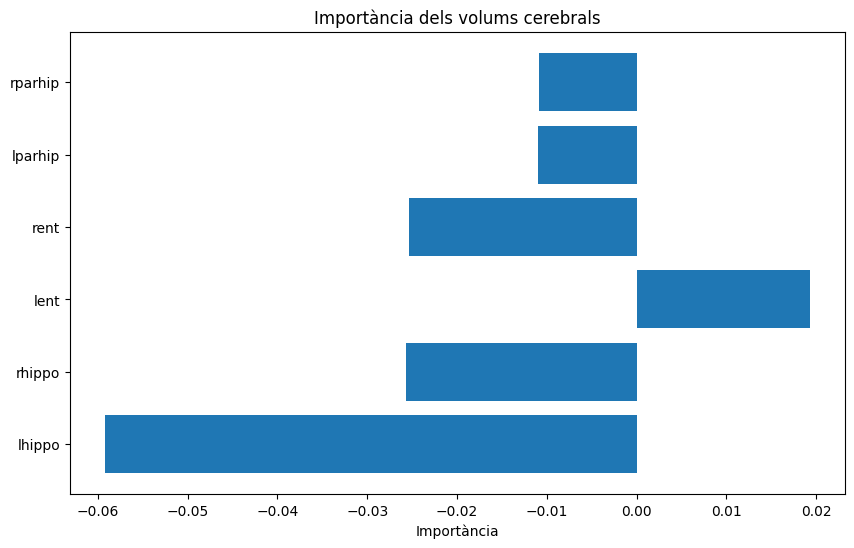

In [28]:
# Creo una llista amb les importàncies dels volums cerebrals 
importances = volum_import.toArray().tolist()

# Crear un gràfic de barres per mostrar les importàncies
plt.figure(figsize=(10, 6))
plt.barh(volum_column, importances)
plt.xlabel('Importància')
plt.title('Importància dels volums cerebrals')
plt.show()

Aquest gràfic mostra que **lent** és una variable amb **importància o correlació positiva** respecte als índexs de severitat, és a dir, quan lent augmenta, els índexs tendeixen a augmentar. **lhippo, rhippo, rent, lparhip i rparhip** són variables amb **influència negativa**, això significa que quan augmenten, els índexs de severitat tendeixen a disminuir.

En vista d’aquest resultat, miro la fiabilitat de la predicció mitjançant el **coeficient de determinació (R²)**.

In [29]:
from pyspark.ml.evaluation import RegressionEvaluator

# Bucle per ajustar el model per a cada índex de severitat
for severitat_column in severitat_columns:
    # ... (el meu codi anterior)

    # Creo un evaluador de la regressió
    evaluator = RegressionEvaluator(labelCol=severitat_column, predictionCol="prediction", metricName="r2")

    # Calculo R²
    r_squared = evaluator.evaluate(predictions)
    print(f"R² per {severitat_column}: {r_squared}")

R² per delsev: -0.03433083537284598
R² per hallsev: -0.4841780255564878
R² per agitsev: -0.0026006065587960148
R² per depdsev: -0.053165529149714175
R² per anxsev: -0.026393098760019384
R² per elatsev: -0.5504605755338889
R² per apasev: -0.011266779883507771
R² per disnsev: 0.012233650443195576
R² per irrsev: -0.03389810116722547
R² per motsev: -0.005315827738889833
R² per nitesev: -0.0011540552904880652
R² per appsev: 0.016322444736089015


Els valors negatius dels coeficients de determinació (R²) indiquen que el **model no és adequat per predir els índexs de severitat** en les dades actuals. Per tant, vaig a provar algun altra model que millori la capacitat predictiva per a aquestes variables.

## <span style="color:#9366b3">Prediccions mitjançant un Random Forest</span>

El Random Forest és un model d'aprenentatge automàtic que pot ser utilitzat per a problemes de regressió, és més robust que la regressió lineal i pot manejar relacions no lineals, per això, crec que si és possible fer una predicció, amb aquest model és l’adequat.

Volums cerebrals per a l'índex de severitat delsev:
     Volum                                        Importancia
0   lhippo  (0.17148098594528982, 0.14499377738200916, 0.1...
1   rhippo  (0.17148098594528982, 0.14499377738200916, 0.1...
2     lent  (0.17148098594528982, 0.14499377738200916, 0.1...
3     rent  (0.17148098594528982, 0.14499377738200916, 0.1...
4  lparhip  (0.17148098594528982, 0.14499377738200916, 0.1...
5  rparhip  (0.17148098594528982, 0.14499377738200916, 0.1...


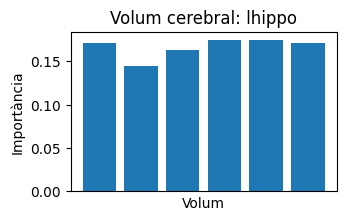

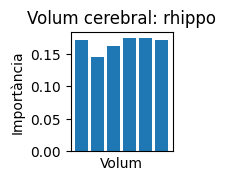

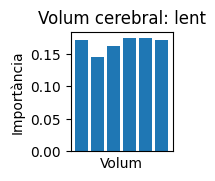

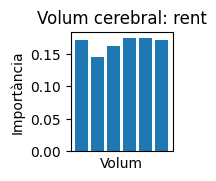

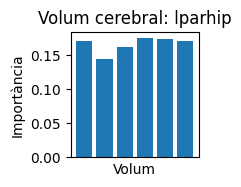

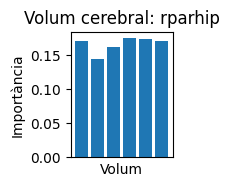

Volums cerebrals per a l'índex de severitat hallsev:
     Volum                                        Importancia
0   lhippo  (0.21210293277536546, 0.12632091203018614, 0.1...
1   rhippo  (0.21210293277536546, 0.12632091203018614, 0.1...
2     lent  (0.21210293277536546, 0.12632091203018614, 0.1...
3     rent  (0.21210293277536546, 0.12632091203018614, 0.1...
4  lparhip  (0.21210293277536546, 0.12632091203018614, 0.1...
5  rparhip  (0.21210293277536546, 0.12632091203018614, 0.1...


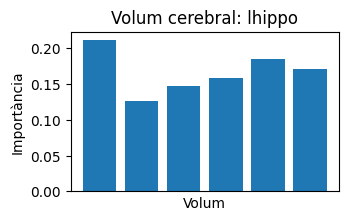

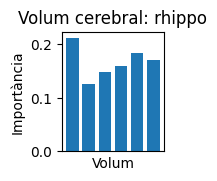

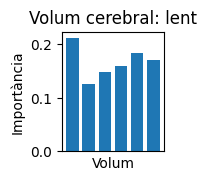

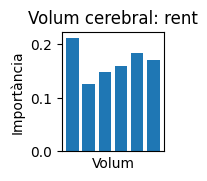

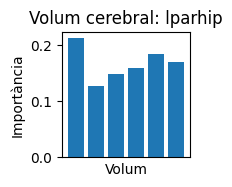

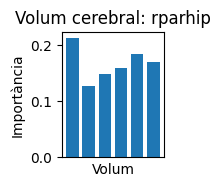

Volums cerebrals per a l'índex de severitat agitsev:
     Volum                                        Importancia
0   lhippo  (0.174063641514799, 0.15221147264160242, 0.168...
1   rhippo  (0.174063641514799, 0.15221147264160242, 0.168...
2     lent  (0.174063641514799, 0.15221147264160242, 0.168...
3     rent  (0.174063641514799, 0.15221147264160242, 0.168...
4  lparhip  (0.174063641514799, 0.15221147264160242, 0.168...
5  rparhip  (0.174063641514799, 0.15221147264160242, 0.168...


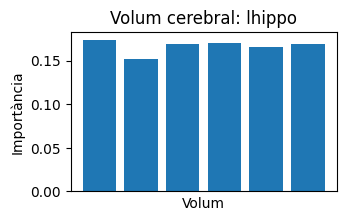

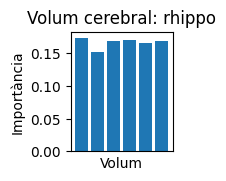

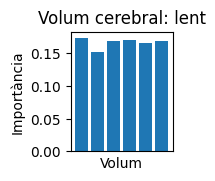

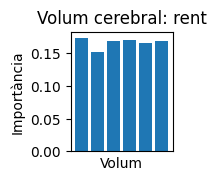

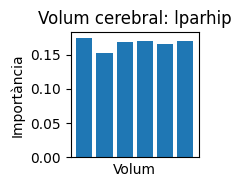

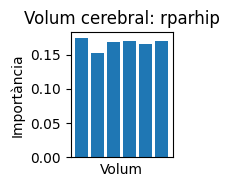

Volums cerebrals per a l'índex de severitat depdsev:
     Volum                                        Importancia
0   lhippo  (0.17629373130159032, 0.1441825220038831, 0.17...
1   rhippo  (0.17629373130159032, 0.1441825220038831, 0.17...
2     lent  (0.17629373130159032, 0.1441825220038831, 0.17...
3     rent  (0.17629373130159032, 0.1441825220038831, 0.17...
4  lparhip  (0.17629373130159032, 0.1441825220038831, 0.17...
5  rparhip  (0.17629373130159032, 0.1441825220038831, 0.17...


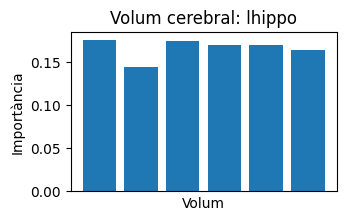

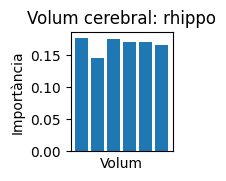

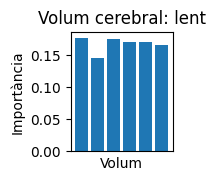

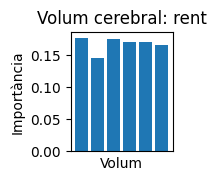

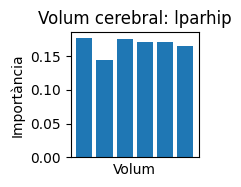

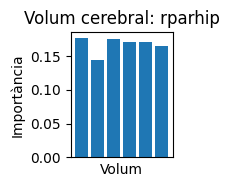

Volums cerebrals per a l'índex de severitat anxsev:
     Volum                                        Importancia
0   lhippo  (0.18346451067516317, 0.13971462410185115, 0.1...
1   rhippo  (0.18346451067516317, 0.13971462410185115, 0.1...
2     lent  (0.18346451067516317, 0.13971462410185115, 0.1...
3     rent  (0.18346451067516317, 0.13971462410185115, 0.1...
4  lparhip  (0.18346451067516317, 0.13971462410185115, 0.1...
5  rparhip  (0.18346451067516317, 0.13971462410185115, 0.1...


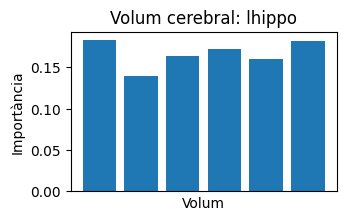

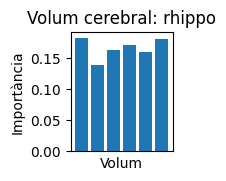

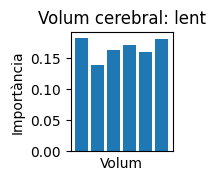

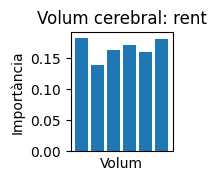

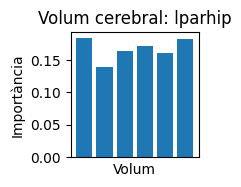

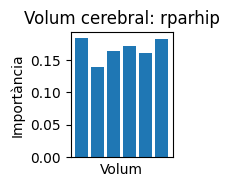

Volums cerebrals per a l'índex de severitat elatsev:
     Volum                                        Importancia
0   lhippo  (0.18865318485898266, 0.14401020317106197, 0.1...
1   rhippo  (0.18865318485898266, 0.14401020317106197, 0.1...
2     lent  (0.18865318485898266, 0.14401020317106197, 0.1...
3     rent  (0.18865318485898266, 0.14401020317106197, 0.1...
4  lparhip  (0.18865318485898266, 0.14401020317106197, 0.1...
5  rparhip  (0.18865318485898266, 0.14401020317106197, 0.1...


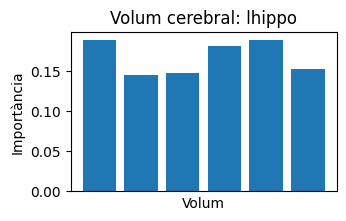

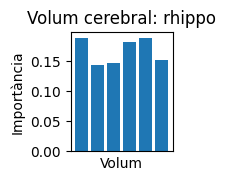

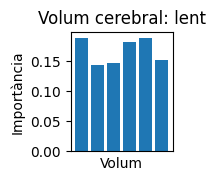

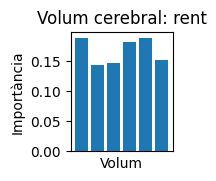

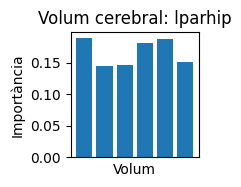

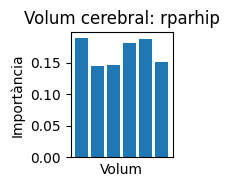

Volums cerebrals per a l'índex de severitat apasev:
     Volum                                        Importancia
0   lhippo  (0.17839917445754291, 0.1555278974615809, 0.16...
1   rhippo  (0.17839917445754291, 0.1555278974615809, 0.16...
2     lent  (0.17839917445754291, 0.1555278974615809, 0.16...
3     rent  (0.17839917445754291, 0.1555278974615809, 0.16...
4  lparhip  (0.17839917445754291, 0.1555278974615809, 0.16...
5  rparhip  (0.17839917445754291, 0.1555278974615809, 0.16...


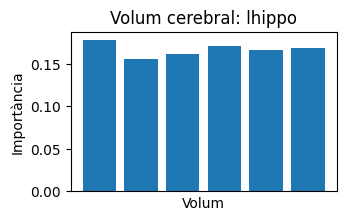

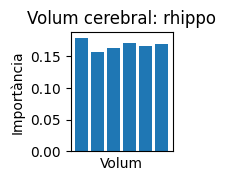

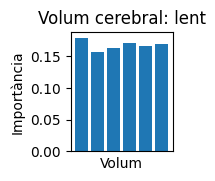

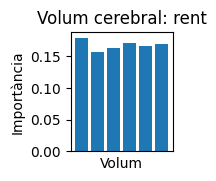

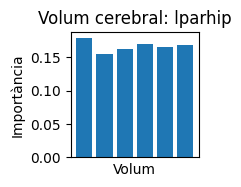

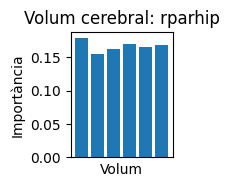

Volums cerebrals per a l'índex de severitat disnsev:
     Volum                                        Importancia
0   lhippo  (0.18263256572051678, 0.14795340473565358, 0.1...
1   rhippo  (0.18263256572051678, 0.14795340473565358, 0.1...
2     lent  (0.18263256572051678, 0.14795340473565358, 0.1...
3     rent  (0.18263256572051678, 0.14795340473565358, 0.1...
4  lparhip  (0.18263256572051678, 0.14795340473565358, 0.1...
5  rparhip  (0.18263256572051678, 0.14795340473565358, 0.1...


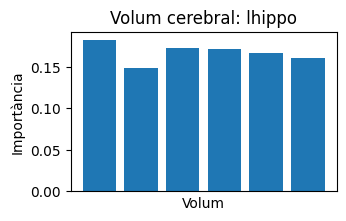

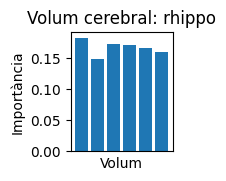

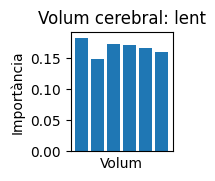

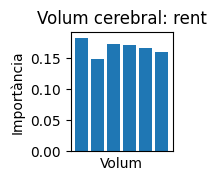

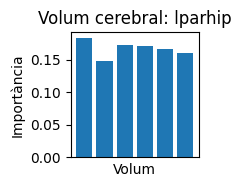

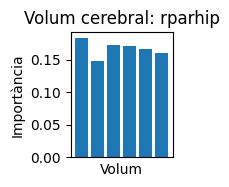

Volums cerebrals per a l'índex de severitat irrsev:
     Volum                                        Importancia
0   lhippo  (0.17922679957262583, 0.15240432699243006, 0.1...
1   rhippo  (0.17922679957262583, 0.15240432699243006, 0.1...
2     lent  (0.17922679957262583, 0.15240432699243006, 0.1...
3     rent  (0.17922679957262583, 0.15240432699243006, 0.1...
4  lparhip  (0.17922679957262583, 0.15240432699243006, 0.1...
5  rparhip  (0.17922679957262583, 0.15240432699243006, 0.1...


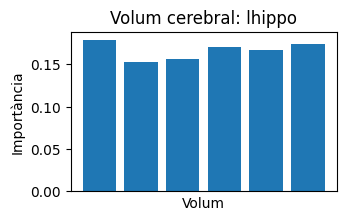

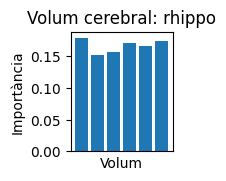

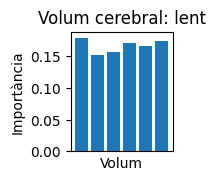

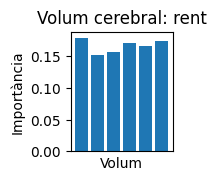

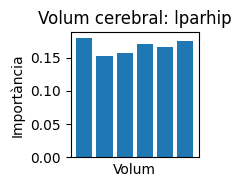

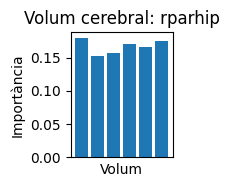

Volums cerebrals per a l'índex de severitat motsev:
     Volum                                        Importancia
0   lhippo  (0.18114674235536599, 0.14931900838364384, 0.1...
1   rhippo  (0.18114674235536599, 0.14931900838364384, 0.1...
2     lent  (0.18114674235536599, 0.14931900838364384, 0.1...
3     rent  (0.18114674235536599, 0.14931900838364384, 0.1...
4  lparhip  (0.18114674235536599, 0.14931900838364384, 0.1...
5  rparhip  (0.18114674235536599, 0.14931900838364384, 0.1...


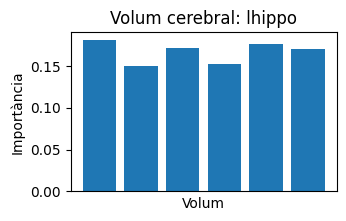

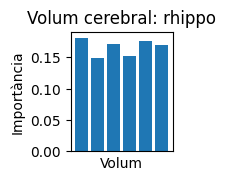

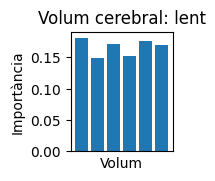

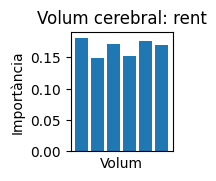

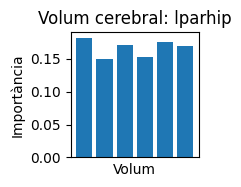

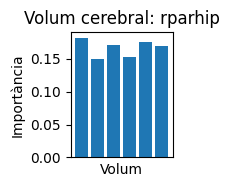

Volums cerebrals per a l'índex de severitat nitesev:
     Volum                                        Importancia
0   lhippo  (0.18035831584574133, 0.1576711828601291, 0.15...
1   rhippo  (0.18035831584574133, 0.1576711828601291, 0.15...
2     lent  (0.18035831584574133, 0.1576711828601291, 0.15...
3     rent  (0.18035831584574133, 0.1576711828601291, 0.15...
4  lparhip  (0.18035831584574133, 0.1576711828601291, 0.15...
5  rparhip  (0.18035831584574133, 0.1576711828601291, 0.15...


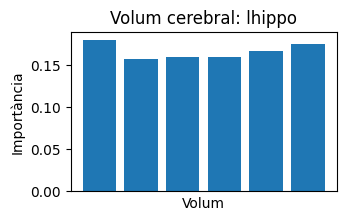

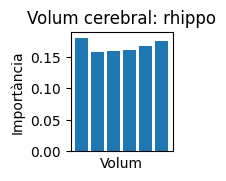

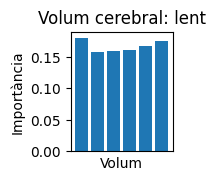

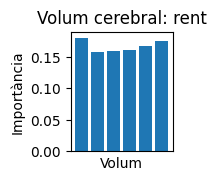

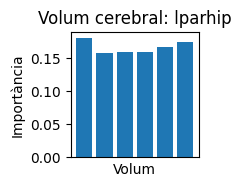

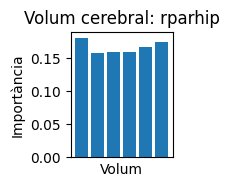

Volums cerebrals per a l'índex de severitat appsev:
     Volum                                        Importancia
0   lhippo  (0.19098713668039882, 0.13903508829957162, 0.1...
1   rhippo  (0.19098713668039882, 0.13903508829957162, 0.1...
2     lent  (0.19098713668039882, 0.13903508829957162, 0.1...
3     rent  (0.19098713668039882, 0.13903508829957162, 0.1...
4  lparhip  (0.19098713668039882, 0.13903508829957162, 0.1...
5  rparhip  (0.19098713668039882, 0.13903508829957162, 0.1...


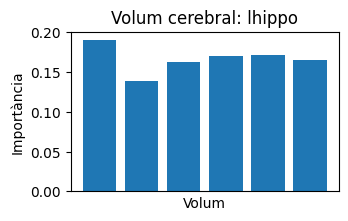

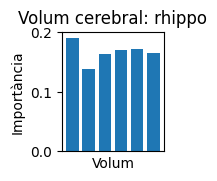

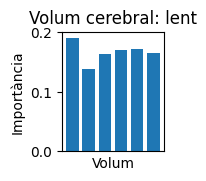

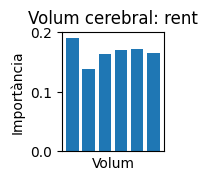

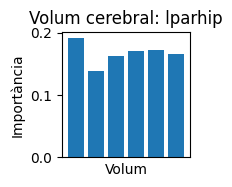

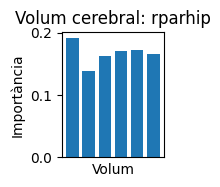

In [30]:
from pyspark.ml.regression import RandomForestRegressor

# Bucle per ajustar un model per a cada índex de severitat
for severitat_column in severitat_columns:
    # Creo un VectorAssembler amb els volums cerebrals
    assembler = VectorAssembler(inputCols=volum_column, outputCol="features")

    # Creo el model de Random Forest Regressor
    rf = RandomForestRegressor(featuresCol="features", labelCol=severitat_column, numTrees=100, maxDepth=10)

    # Creo un pipeline per organitzar les etapes
    pipeline = Pipeline(stages=[assembler, rf])

    # Ajusto el model a les dades d'entrenament
    model = pipeline.fit(training_data)

    # Faig les prediccions amb les dades de prova
    predictions = model.transform(test_data)

    # Visualitzo els volums cerebrals
    feature_importance = model.stages[-1].featureImportances
    feature_importance_df = pd.DataFrame({'Volum': volum_column, 'Importancia': feature_importance})
    print(f"Volums cerebrals per a l'índex de severitat {severitat_column}:")
    print(feature_importance_df)

    # Creo una nova figura per al gràfic
    plt.figure(figsize=(12, 6))

    # Itero a través de les files de feature_importance_df
    for index, row in feature_importance_df.iterrows():
        feature_name = row['Volum']
        importance_values = row['Importancia']
    
        # Creo un subplot per a cada índex de severitat
        plt.subplot(3, 4, index + 1)  # 3 files i 4 columnes pels 12 índexs
        plt.bar(range(len(importance_values)), importance_values)
        plt.title(f"Volum cerebral: {feature_name}")
        plt.xlabel("Volum")
        plt.ylabel("Importància")
        plt.xticks([])  

        # Mostro els subplots
        plt.tight_layout()
        plt.show()

In [31]:
# Bucle per ajustar el model
for severitat_column in severitat_columns:
    # ... (codi anterior)

    # Avaluo el model
    evaluator = RegressionEvaluator(labelCol=severitat_column, predictionCol="prediction", metricName="r2")
    r2 = evaluator.evaluate(predictions)
    print(f"R^2 per {severitat_column}: {r2}")

R^2 per delsev: -0.05630064302058435
R^2 per hallsev: -0.8057139984030375
R^2 per agitsev: 0.0037453270597378463
R^2 per depdsev: -0.0698514214419308
R^2 per anxsev: -0.013029471412634885
R^2 per elatsev: -1.0189674164408578
R^2 per apasev: -0.01246377129616616
R^2 per disnsev: -0.024346229699366173
R^2 per irrsev: -0.04689413999685077
R^2 per motsev: -0.07590662482445465
R^2 per nitesev: -0.020507128108068207
R^2 per appsev: 0.035430169115211574


Uns valors de R² negatius o propers a 0 indiquen que el model no és adequat per explicar les dades per a aquests índexs de severitat. Per tant, és el 2n model de predicció que falla.

En vista d’aquests resultats, puc concloure que amb **les dades actuals no puc predir com variaran els índexs de severitat segons els canvis en els volums cerebrals durant l’evolució de la malaltia d’Alzheimer**.

# <span style="color:#650099">Objectius secundaris</span>
## <span style="color:#9366b3">Identificar Patrons de Correlació</span>

Vaig a veure si puc identificar patrons de correlació entre els volums de regions cerebrals i els diferents símptomes o comportaments mitjançant un anàlisi de correlació i, així intentar revelar quines regions cerebrals tenen correlacions més fortes o més febles amb els índexs de severitat.

Per això, calcularé una matriu de correlació i la visualitzaré amb un mapa de calor. També faré una validació estadística per les correlacions d'interès. 

In [ ]:
#pip install --upgrade pandas
#pip install --upgrade pandas numpy

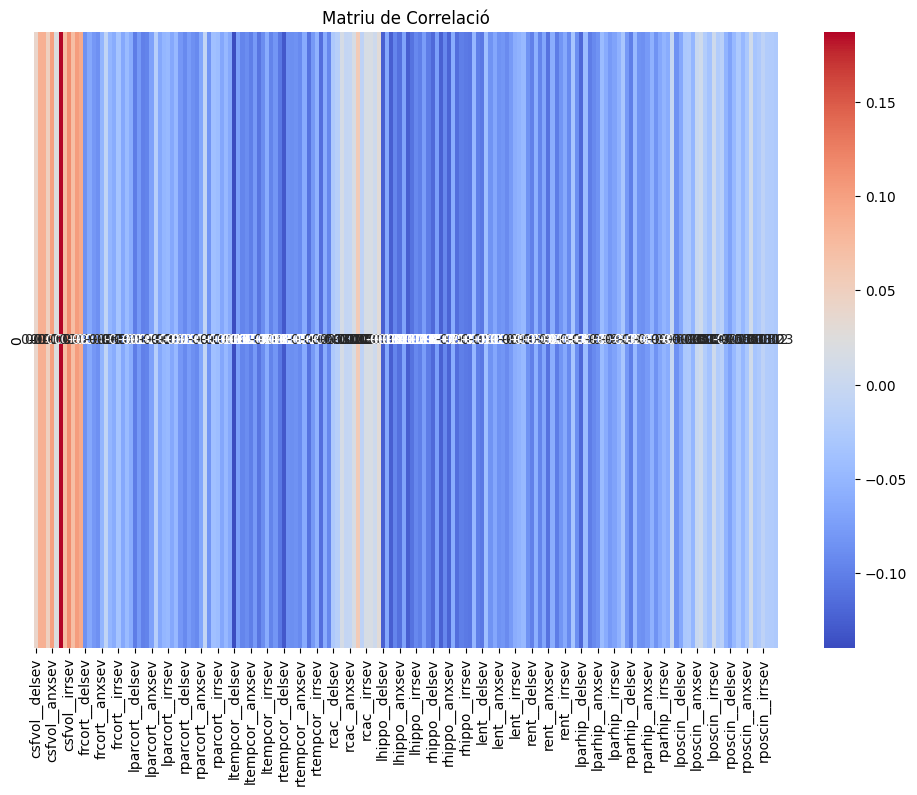

In [32]:
# Columnes a analitzar
volum_column = ['csfvol', 'frcort', 'lparcort', 'rparcort', 'ltempcor', 'rtempcor', 'rcac', 'lhippo', 'rhippo', 'lent', 'rent', 'lparhip', 'rparhip', 'lposcin', 'rposcin']
severitat_column = ['delsev', 'hallsev', 'agitsev', 'depdsev', 'anxsev', 'elatsev', 'apasev', 'disnsev', 'irrsev', 'motsev', 'nitesev', 'appsev']

# Calculo la matriu de correlació
correlation_matrix = df.select([corr(col1, col2).alias(col1 + '__' + col2) for col1 in volum_column for col2 in severitat_column]).toPandas()

# Visualitzo la Matriu de Correlació amb un mapa de calor
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriu de Correlació')
plt.show()

Faig l'**anàlisi estadístic** per valorar la matriu de correlació.

In [33]:
from pyspark.ml.stat import Correlation
from scipy import stats

# Columnes a analitzar
volum_column = ['csfvol', 'frcort', 'lparcort', 'rparcort', 'ltempcor', 'rtempcor', 'rcac', 'lhippo', 'rhippo', 'lent', 'rent', 'lparhip', 'rparhip', 'lposcin', 'rposcin']
severitat_column = ['delsev', 'hallsev', 'agitsev', 'depdsev', 'anxsev', 'elatsev', 'apasev', 'disnsev', 'irrsev', 'motsev', 'nitesev', 'appsev']

# Combino totes les columnes en un volum únic
assembler = VectorAssembler(inputCols=volum_column + severitat_column, outputCol="volums")
df_assembled = assembler.transform(df)

# Calculo la matriu de correlació
corr_matrix = Correlation.corr(df_assembled, "volums").collect()[0][0]

# Inicialitzo una matriu per emmagatzemar els valors p
num_volum_columns = len(volum_column)
num_severitat_columns = len(severitat_column)
p_values = np.zeros((num_volum_columns, num_severitat_columns))

# Calcula els valorsp utilitzant les correlacions i el nombre de mostres
for i in range(num_volum_columns):
    for j in range(num_severitat_columns):
        r = corr_matrix[i + num_severitat_columns, j]
        n = df_assembled.count()
        t_stat = r * np.sqrt((n - 2) / (1 - r**2))
        p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-2))
        p_values[i, j] = p_value

# Visualitzo la matriu
for i, col1 in enumerate(volum_column):
    for j, col2 in enumerate(severitat_column):
        print(f'Valor per {col1} i {col2}: {p_values[i, j]}')

Valor per csfvol i delsev: 1.9370505199844956e-11
Valor per csfvol i hallsev: 0.0
Valor per csfvol i agitsev: 0.0
Valor per csfvol i depdsev: 0.0
Valor per csfvol i anxsev: 0.0
Valor per csfvol i elatsev: 0.0
Valor per csfvol i apasev: 0.0
Valor per csfvol i disnsev: 0.0
Valor per csfvol i irrsev: 0.0
Valor per csfvol i motsev: 0.0
Valor per csfvol i nitesev: 0.0
Valor per csfvol i appsev: 0.0
Valor per frcort i delsev: 0.0
Valor per frcort i hallsev: 0.0
Valor per frcort i agitsev: 0.0
Valor per frcort i depdsev: 0.0
Valor per frcort i anxsev: 0.0
Valor per frcort i elatsev: 0.0
Valor per frcort i apasev: 0.0
Valor per frcort i disnsev: 0.0
Valor per frcort i irrsev: 0.0
Valor per frcort i motsev: 0.0
Valor per frcort i nitesev: 0.0
Valor per frcort i appsev: 0.0
Valor per lparcort i delsev: 0.0
Valor per lparcort i hallsev: 0.0
Valor per lparcort i agitsev: 0.0
Valor per lparcort i depdsev: 0.0
Valor per lparcort i anxsev: 0.0
Valor per lparcort i elatsev: 0.0
Valor per lparcort i ap

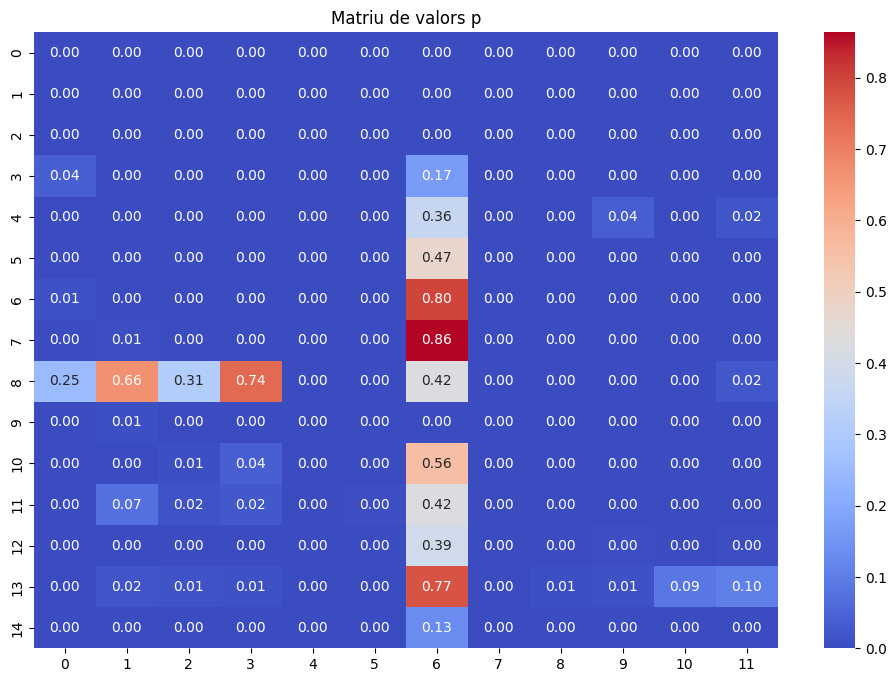

In [34]:
# Visualització de la matriu de valors p
plt.figure(figsize=(12, 8))
sns.heatmap(p_values.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriu de valors p')
plt.show()

Els volums cerebrals tenen correlacions significatives amb els índexs de severitat en molts casos, no tots.

Quan el valor p és molt petit, 0,0 o un valor molt petit, hi ha una correlació significativa entre les 2 variables i aquesta correlació és molt improbable que sigui el resultat del pur atzar (color blau fosc).

Tenim altres correlacions significatives  amb valor pròxims a 0, indica significança, però pot ser una mica més baixa que en el cas anterior (color blau clar).

També hi ha relacions sense significança, i per tant, la correlació pot ser el resultat del pur atzar (colors clar cap el vermell)

Això significa, que **molts dels índexs és relacionen de manera significativa amb els volums cerebrals i per tant, hi ha relació entre ells**, però com he vist anteriorment, aquesta correlació no ens ha portat a poder fer un model predictiu.

## <span style="color:#9366b3">Cerca de interaccions complexes</span>

Mitjançant tècniques d'anàlisi multivariant vull examinar si hi ha interaccions complexes entre les múltiples variables cerebrals i els símptomes. En vista de tot l’anterior, cercaré interaccions segons el diagnòstic entre els índexs de severitat, les activitats quotidianes i els volums cerebrals.

Per això, utilitzaré l'**anàlisi de variància multivariant (MANOVA)** que és una tècnica estadística que s'utilitza per analitzar simultàniament múltiples variables dependents (índexs de severitat, activitats quotidianes i els volums cerebrals) estan relacionades amb una o més variables independents (aquí diagnòstic).

**NOTA**: He intentat fer el MANOVA amb les 3 variables depenents juntes però no me sortit. per això, ho he fet en 2 passes.

In [35]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Converteixo el df a un de Pandas
df_pandas = df.toPandas()

# Defineixo les columnes
severitat_column = ['delsev', 'hallsev', 'agitsev', 'depdsev', 'anxsev', 'elatsev', 'apasev', 'disnsev', 'irrsev', 'motsev', 'nitesev', 'appsev']
vida_column = ['bills', 'taxes', 'shopping', 'games', 'stove', 'mealprep', 'events', 'payattn', 'remdates', 'travel']
diagnostic_column = 'diagnosis'

# Creo la fórmula per a la MANOVA
formula = f"{'+'.join(severitat_column + vida_column)} ~ {diagnostic_column}"

# MANOVA
manova = MANOVA.from_formula(formula, data=df_pandas)
print(manova.mv_test())

# Miro altres estadístiques
print(manova.mv_test().summary())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
        Intercept        Value   Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.8919 22.0000 2677.0000 14.7507 0.0000
          Pillai's trace 0.1081 22.0000 2677.0000 14.7507 0.0000
  Hotelling-Lawley trace 0.1212 22.0000 2677.0000 14.7507 0.0000
     Roy's greatest root 0.1212 22.0000 2677.0000 14.7507 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       diagnosis        Value   Num DF   Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.4387 22.0000 2677.0000 155.6722 0.0000
         Pillai's trace 0.5613 22.0000 2677.0

In [53]:
# Converteixo el df a un de Pandas
df_pandas2 = df.toPandas()

# Defineixo les columnes
volum_column = ['csfvol', 'frcort', 'lparcort', 'rparcort', 'ltempcor', 'rtempcor', 'rcac', 'lhippo', 'rhippo', 'lent', 'rent', 'lparhip', 'rparhip', 'lposcin', 'rposcin']
vida_column = ['bills', 'taxes', 'shopping', 'games', 'stove', 'mealprep', 'events', 'payattn', 'remdates', 'travel']
diagnostic_column = 'diagnosis'

# Creo la fórmula per a la MANOVA
formula = f"{'+'.join(volum_columns + vida_columns)} ~ {diagnostic_column}"

# MANOVA
manova = MANOVA.from_formula(formula, data=df_pandas2)
print(manova.mv_test())

# Miro altres estadístiques
print(manova.mv_test().summary())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0163 25.0000 2674.0000 6470.7501 0.0000
         Pillai's trace  0.9837 25.0000 2674.0000 6470.7501 0.0000
 Hotelling-Lawley trace 60.4969 25.0000 2674.0000 6470.7501 0.0000
    Roy's greatest root 60.4969 25.0000 2674.0000 6470.7501 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
         diagnosis        Value   Num DF   Den DF  F Value  Pr > F
------------------------------------------------------------------
            Wilks' lambda 0.3923 25.0000 2674.0000 165.6902 0.0000
           Pilla

**Influència per les variables dependents**:<br>
**Volums cerebral**s: Valor F = 6.470,7501, Pr > F = 0,0<br>
**Activitats quotidianes**: Valor F = 155,6722; Pr > F = 0,0<br>
**Índexs de severitat**: Valor F = 14,7507; Pr > F = 0,0

**Els volums cerebrals ténen una influència molt més significativa** que la resta de variables però, **activitats quotidianes té una influència més significativa que els índexs de severitat**, segons els valors de F i la Pr > F.

Aquest anàlisi mostra que hi ha diferències significatives entre activitats quotidianes e índexs de severitat per la variable diagnòstic, ja que el valor p (Pr > F) és igual a 0,0, el que indica que les diferències no són aleatòries i per tant, **diagnòstic té un efecte significatiu**.

## <span style="color:#9366b3">Exploració de Subgrups</span>

Segons característiques com l'edat o el nivell d'educació i investiga com les relacions poden variar en aquests subgrups.

In [62]:
# Converteixo el df a un de Pandas
df_pandas3 = df.toPandas()

# Creo un model d'ANOVA per cada variable d'activitat quotidiana
vida_column = ['bills', 'taxes', 'shopping', 'games', 'stove', 'mealprep', 'events', 'payattn', 'remdates', 'travel']

for vida in vida_column:
    X = df_pandas3[['female', 'educ']]
    X = sm.add_constant(X)
    y = df_pandas3[vida]
    
    # Ajusto el model
    model = sm.OLS(y, X).fit()
    
    # Calculo la taula ANOVA
    ssr = model.ssr  
    sst = ((y - y.mean())**2).sum() 
    df_regression = 2  
    df_residual = len(y) - 3  
    
    msr = ssr / df_regression  
    mse = (sst - ssr) / df_residual  
    
    f_statistic = msr / mse  
    
    # Calculo el valor p
    p_value = 1 - stats.f.cdf(f_statistic, df_regression, df_residual)
    
    # Imprimeix els resultats
    print(f'ANÀLISI D\'ANOVA PER {vida}')
    print(f'Estadístic F: {f_statistic}')
    print(f'Valor p: {p_value}')
    print('\n')


ANÀLISI D'ANOVA PER bills
Estadístic F: 18889.637585293418
Valor p: 1.1102230246251565e-16


ANÀLISI D'ANOVA PER taxes
Estadístic F: 38586.32325179812
Valor p: 1.1102230246251565e-16


ANÀLISI D'ANOVA PER shopping
Estadístic F: 36662.21382770892
Valor p: 1.1102230246251565e-16


ANÀLISI D'ANOVA PER games
Estadístic F: 83876.50719603531
Valor p: 1.1102230246251565e-16


ANÀLISI D'ANOVA PER stove
Estadístic F: 117670.47387529438
Valor p: 1.1102230246251565e-16


ANÀLISI D'ANOVA PER mealprep
Estadístic F: 13320.16288819393
Valor p: 1.1102230246251565e-16


ANÀLISI D'ANOVA PER events
Estadístic F: 87499.59819665473
Valor p: 1.1102230246251565e-16


ANÀLISI D'ANOVA PER payattn
Estadístic F: 98784.76084835098
Valor p: 1.1102230246251565e-16


ANÀLISI D'ANOVA PER remdates
Estadístic F: 25931.58695146381
Valor p: 1.1102230246251565e-16


ANÀLISI D'ANOVA PER travel
Estadístic F: 51033.01488503939
Valor p: 1.1102230246251565e-16




Podem veure que les activitats més afectades pel gènere (en aquest cas que siguis dona) i l’educació són: l’**ús de l’estufa**, la **capacitat de prestar atenció**, l’**assistència a esdeveniments socials** i els **jocs**, per tant, s’hauria de prestar més atenció en aquestes activitats a mesura que el diagnòstic de la malaltia empitjori.

# <span style="color:#650099">Conclusions</span>

La malaltia de l’Alzheimer és massa complexa per trobar relacions significants rellevants, en aquest projecte he pogut descobrir que els canvis en els volums cerebrals no són tan significatius en el diagnòstic de la malaltia com ho són les activitats quotidianes o els índexs de severitat que són els elements que hauríem de prestar més atenció, sobretot en els índexs i activitats que han mostrat una diferència més gran que la resta.